# Clase 2 - Visualización con ggplot2

Para comenzar cargaremos el paquete (ggplot2), recuerden que se instala sólo la primera vez de uso, cada vez que la volvamos a usar se deberá ejecutar sólo library(ggplot2)

In [57]:
#La puedes comentar para que no se ejecute cada vez que inicies sesión
#install.packages("dplyr", dependencies = TRUE)
#install.packages("ggplot2", dependencies = TRUE) 
library(ggplot2)  #
library(dplyr)

Los gráficos con ggplot tienen una característica notable, es que se pueden agregar capas dependiendo de lo que nos gustaría visualizar.

Vamos a realizar ejemplos con la data "midwest", la cuál contiene información demográfica de los condados del medio oste.

midwest contiene 438 filas y 28 variables, para información más detallada de los datos ejecutar: help(midwest)


In [16]:
data(midwest)  # Para cargar los datos
help(midwest)  #Para buscar información sobre los datos

In [13]:
#Vemos las primeras 6 filas de la data midwest
head(midwest)

PID county    state area  poptotal popdensity popwhite popblack popamerindian
1 561 ADAMS     IL    0.052 66090    1270.9615  63917    1702     98           
2 562 ALEXANDER IL    0.014 10626     759.0000   7054    3496     19           
3 563 BOND      IL    0.022 14991     681.4091  14477     429     35           
4 564 BOONE     IL    0.017 30806    1812.1176  29344     127     46           
5 565 BROWN     IL    0.018  5836     324.2222   5264     547     14           
6 566 BUREAU    IL    0.050 35688     713.7600  35157      50     65           
  popasian ⋯ percollege percprof poppovertyknown percpovertyknown
1 249      ⋯ 19.63139   4.355859 63628           96.27478        
2  48      ⋯ 11.24331   2.870315 10529           99.08714        
3  16      ⋯ 17.03382   4.488572 14235           94.95697        
4 150      ⋯ 17.27895   4.197800 30337           98.47757        
5   5      ⋯ 14.47600   3.367680  4815           82.50514        
6 195      ⋯ 18.90462   3.275891 35107           98.37200        
  percbelowpoverty percchildbelowpovert percadultpoverty percelderlypoverty
1 13.151443        18.01172             11.009776        12.443812         
2 32.244278        45.82651             27.385647        25.228976         
3 12.068844        14.03606             10.852090        12.697410         
4  7.209019        11.17954              5.536013         6.217047         
5 13.520249        13.02289             11.143211        19.200000         
6 10.399635        14.15882              8.179287        11.008586         
  inmetro category
1 0       AAR     
2 0       LHR     
3 0       AAR     
4 1       ALU     
5 0       AAR     
6 0       AAR

In [15]:
summary(midwest)

      PID          county             state                area        
 Min.   : 561   Length:437         Length:437         Min.   :0.00500  
 1st Qu.: 670   Class :character   Class :character   1st Qu.:0.02400  
 Median :1221   Mode  :character   Mode  :character   Median :0.03000  
 Mean   :1437                                         Mean   :0.03317  
 3rd Qu.:2059                                         3rd Qu.:0.03800  
 Max.   :3052                                         Max.   :0.11000  
    poptotal         popdensity          popwhite          popblack      
 Min.   :   1701   Min.   :   85.05   Min.   :    416   Min.   :      0  
 1st Qu.:  18840   1st Qu.:  622.41   1st Qu.:  18630   1st Qu.:     29  
 Median :  35324   Median : 1156.21   Median :  34471   Median :    201  
 Mean   :  96130   Mean   : 3097.74   Mean   :  81840   Mean   :  11024  
 3rd Qu.:  75651   3rd Qu.: 2330.00   3rd Qu.:  72968   3rd Qu.:   1291  
 Max.   :5105067   Max.   :88018.40   Max.   :320494

### Un gráfico inicial con ggplot, queremos ver la relación entre el área del condado con la población.

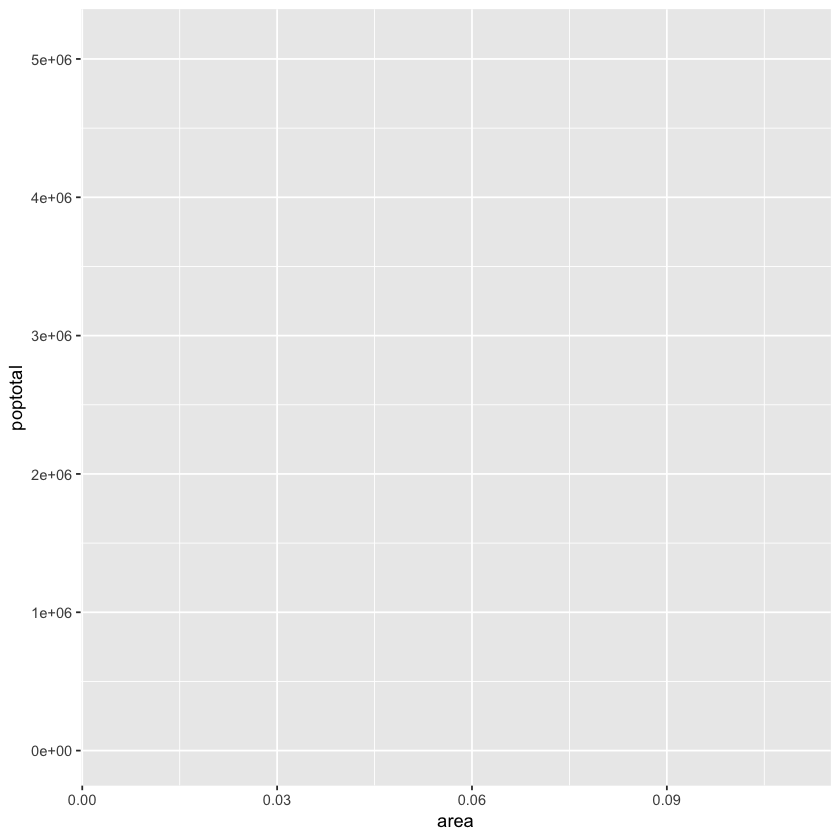

In [5]:
ggplot(midwest, aes(x = area, y = poptotal))

### ¿Qué pasó?

* Se dibuja un ggplot en blanco, a pesar de que se especifican las variables a graficar (x e y), no hay puntos o líneas en él.

* Esto se debe a que ggplot no asume que te refieres a un diagrama de dispersión o un gráfico de líneas, sólo le he dicho a ggplot qué conjunto de datos usar y qué columnas deben usarse para los ejes X e Y. 
* Se les deben pedir explícitamente que dibuje un punto o línea.

### Crear un gráfico de dispersión simple

Unos de los gráficos más utilizado para el análisis de datos es, sin duda, el diagrama de dispersión. Cuando se quiere entender la naturaleza de la relación entre dos variables, invariablemente la primera opción es el diagrama de dispersión.

Sobre el ggplot en blanco agregaremos puntos usando una capa llamada geom_point.

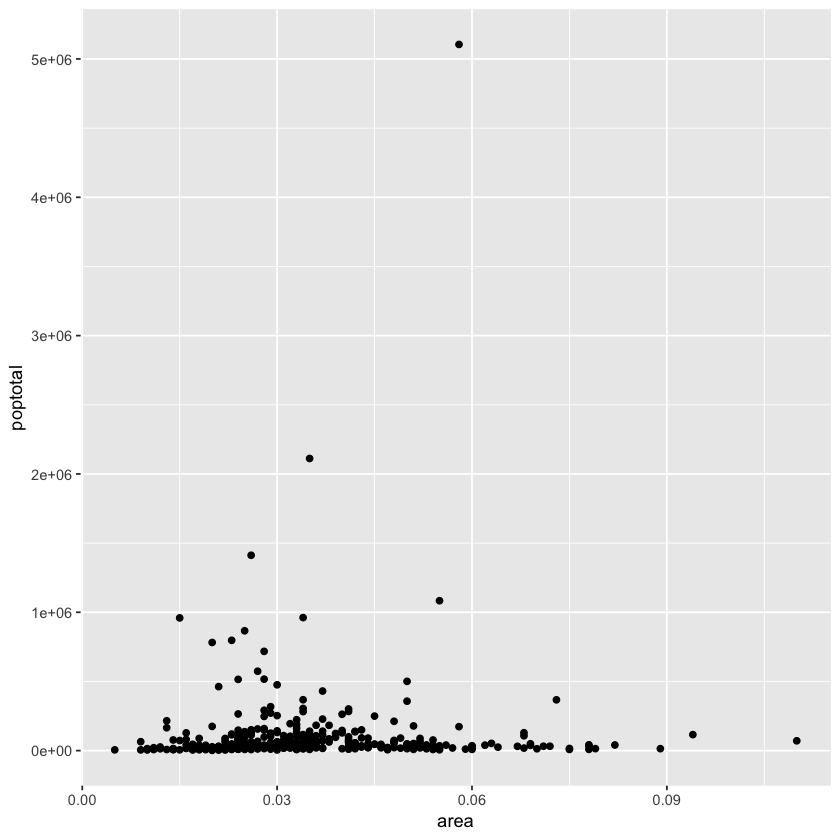

In [8]:
ggplot(midwest, aes(x = area, y = poptotal)) +
        geom_point()

Ahora si vemos los puntos sobre la capa, donde cada punto corresponde a un condado, ¿Se podría mejorar la calidad del gráfico? 

Claro, podemos agregar etiquetas, mejorar las leyendas, agregar títulos, colores, etc. 

También podríamos agregar una capa de suavizado (geom_smooth), el cual nos permite dibujar una línea que ajusta a los datos.

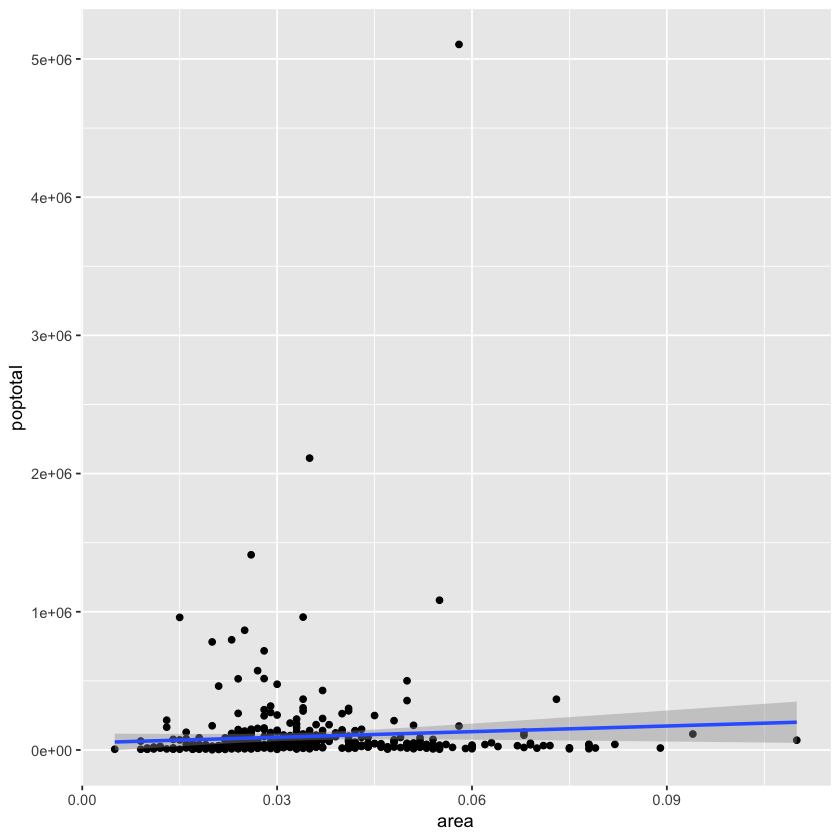

In [9]:
g <- ggplot(midwest, aes(x=area, y=poptotal)) + 
            geom_point() + 
            geom_smooth(method="lm")  
plot(g)

Ahora, hay una cantidad importante de datos acumulados en la parte inferior del gráfico, eso podría dificultar la interpretación de éstos, veremos si cambiando los límites de los ejes se puede ver mejor,

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

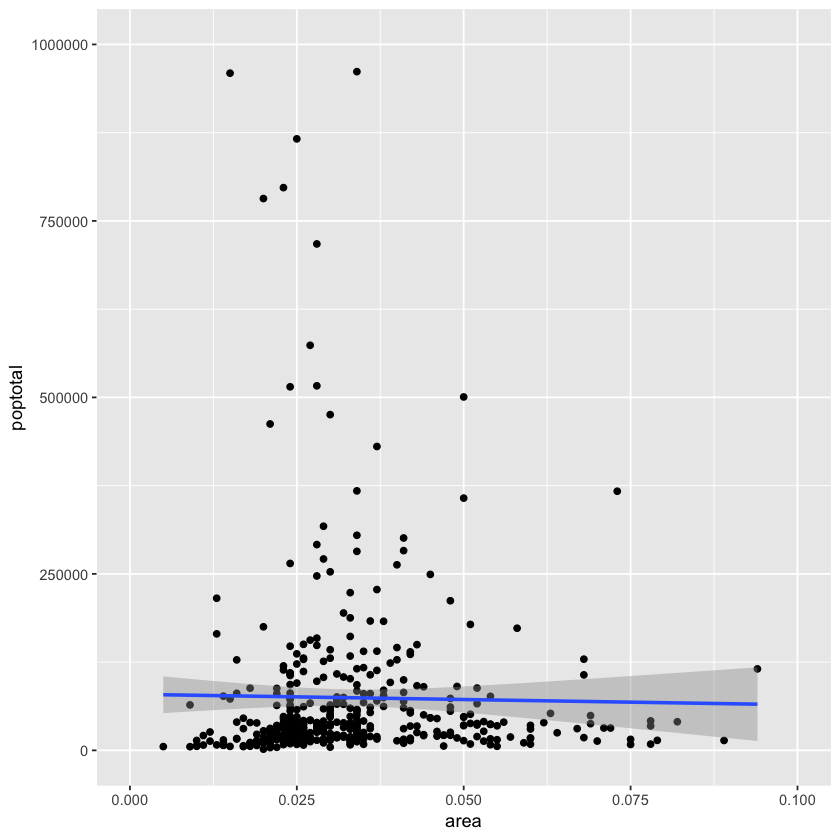

In [19]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
            geom_point() + 
            geom_smooth(method="lm") + 
            xlim(c(0, 0.1)) + ylim(c(0, 1000000))  + 
            xlim(0, 0.1) + ylim(0, 1000000)   

¿Notó que la línea de mejor ajuste se volvió más horizontal en comparación con la anterior? 

Esto se debe a que, al usar xlim () e ylim (), los puntos fuera del rango especificado se omiten y no se considerarán al dibujar la línea de mejor ajuste. 

Esta característica puede ser útil cuando desee saber cómo cambiaría la línea de mejor ajuste cuando se eliminen algunos valores extremos (o valores atípicos).

## ¿Cómo agregamos títulos o etiquetas de los ejes?

Para agregar títulos y las etiquetas de los ejes X e Y, se puede 
usar la función "+ labs()"" teniendo esí como título el argumento de aquella función.

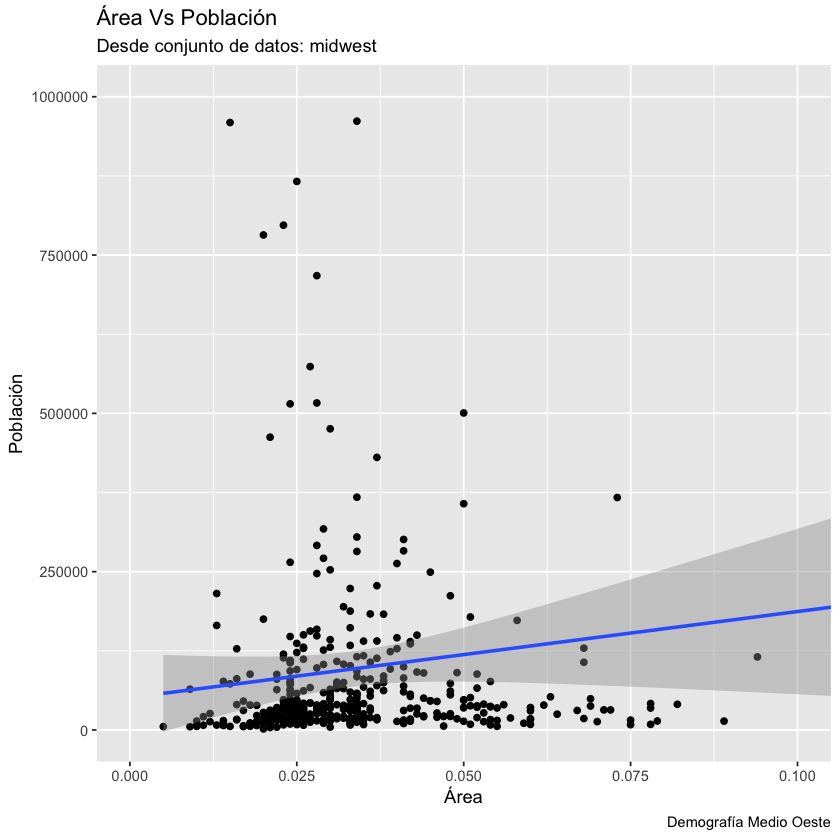

In [22]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
            geom_point() + 
            geom_smooth(method="lm") + 
            coord_cartesian(xlim=c(0,0.1), ylim=c(0, 1000000)) +
             labs(title="Área Vs Población", 
                  subtitle="Desde conjunto de datos: midwest", 
                  y="Población", x="Área", caption="Demografía Medio Oeste")

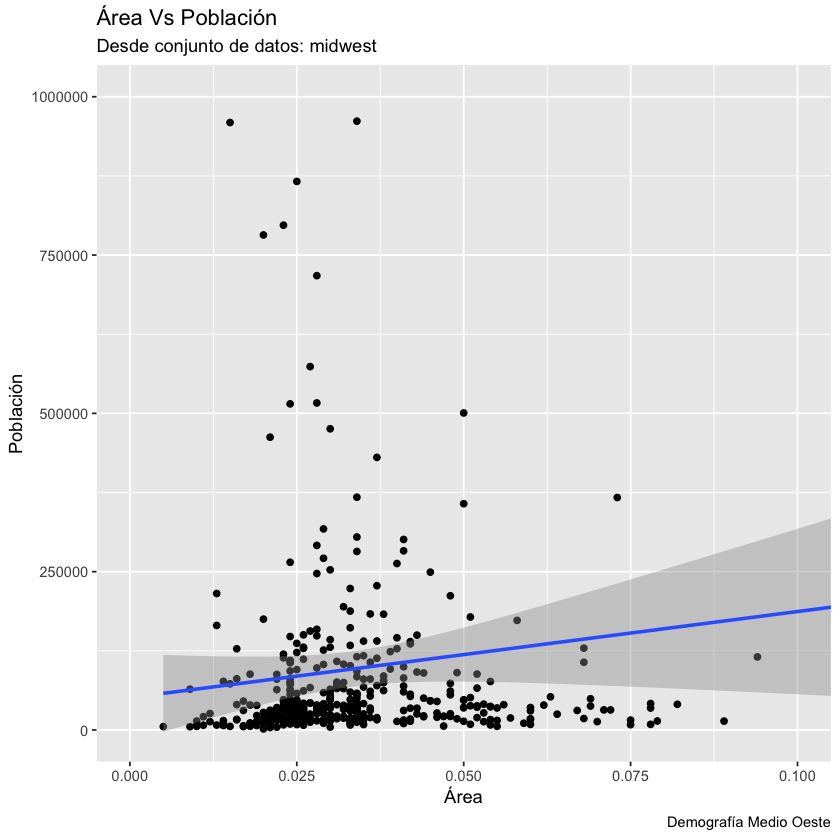

In [23]:
# O puede ser de la siguiente manera
ggplot(midwest, aes(x=area, y=poptotal)) + 
            geom_point() + 
            geom_smooth(method="lm") + 
            coord_cartesian(xlim=c(0,0.1), ylim=c(0, 1000000)) +
            labs(title="Área Vs Población", 
                  subtitle="Desde conjunto de datos: midwest", 
                  y = "Población", x = "Área", caption = "Demografía Medio Oeste") + 
            ggtitle("Área Vs Población", subtitle="Desde conjunto de datos: midwest") + 
            xlab("Área") + ylab("Población")

## ¿Cómo cambiamos los colores o tamaños de puntos?

Se puede cambiar la estética de los gráficos, modificando colores, formas y tamaños.

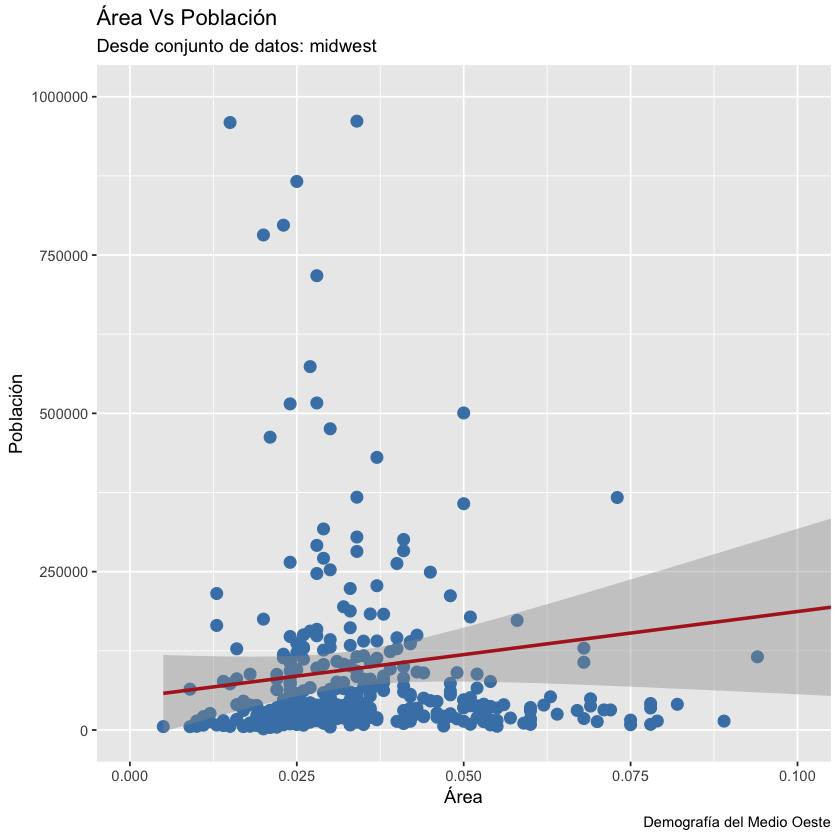

In [25]:
ggplot(midwest, aes(x = area, y = poptotal)) + 
  geom_point(col = "steelblue", size=3) +   # Cambia el color y tamaño de los puntos
  geom_smooth(method="lm", col="firebrick") +  # Cambia el color de la línea
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Área Vs Población", 
       subtitle="Desde conjunto de datos: midwest", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste")


## Podemos además cambiar los colores dependiendo de alguna categoría 

Si tenemos dentro del mismo conjunto de datos otra columna que nos interesaría graficar podemos hacerlo dentro de la estética del gráfico.

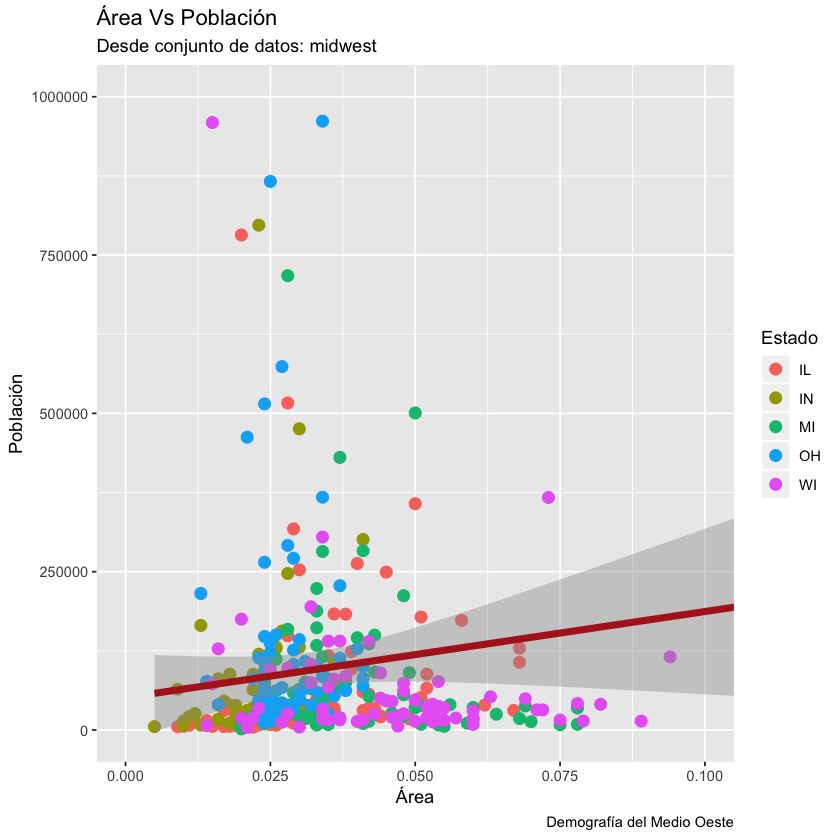

In [28]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Área Vs Población", 
       subtitle="Desde conjunto de datos: midwest", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado")

Cada punto está coloreado dependiendo del estado al que pertenece, debido a que especificamos la columna "state" (col=state) en una capa que cambia la estética del gráfico, también se pueden modificar la forma, el grosor, relleno.

ggplot es tan inteligente que agrega tantos colores como categorías existan y como para saber agregar una leyenda automáticamente en función de los datos, se puede eliminar si no fuera necesaria o cambiar las etiquetas.

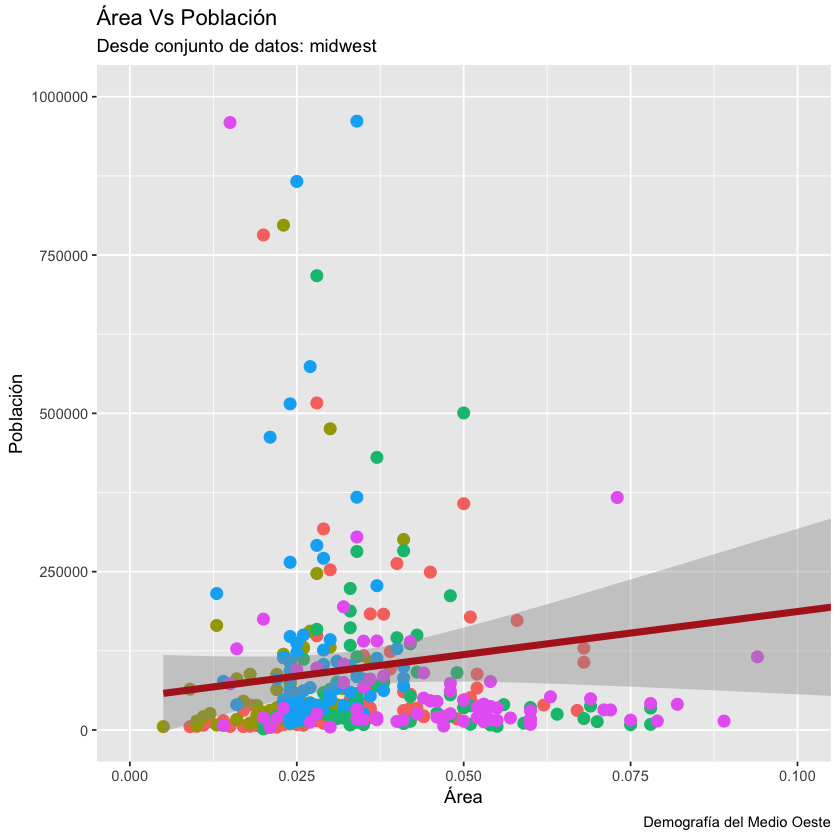

In [31]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Área Vs Población", 
       subtitle="Desde conjunto de datos: midwest", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado")+ 
   theme(legend.position="None")  # Remueve la leyenda

### O podemos cambiar la paleta de colores

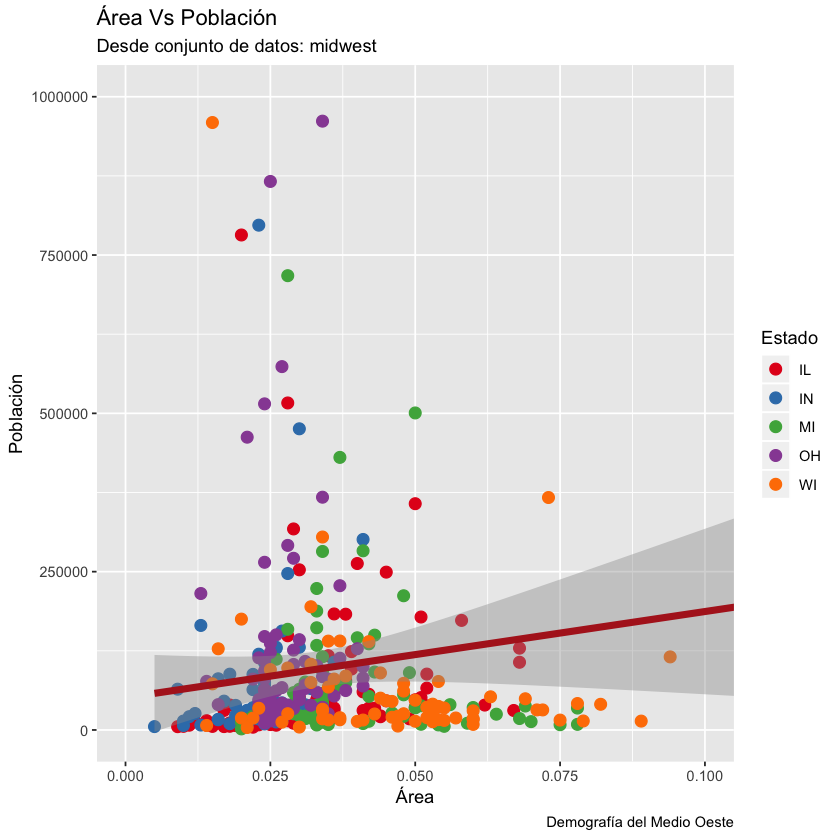

In [33]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Área Vs Población", 
       subtitle="Desde conjunto de datos: midwest", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado") +
  scale_colour_brewer(palette = "Set1")

Si quisieramos ver o encontrar las paletas disponibles se pueden ver de la siguiente manera:

In [34]:
library(RColorBrewer)
head(brewer.pal.info, 10) #Muestra 10 paletas de colores

maxcolors category colorblind
BrBG     11        div       TRUE     
PiYG     11        div       TRUE     
PRGn     11        div       TRUE     
PuOr     11        div       TRUE     
RdBu     11        div       TRUE     
RdGy     11        div      FALSE     
RdYlBu   11        div       TRUE     
RdYlGn   11        div      FALSE     
Spectral 11        div      FALSE     
Accent    8        qual     FALSE

Puedes probar y ver la que más te gusta, la columna que se llama "maxcolors" es la cantidad máxima de colores diferentes que puedes utilizar.

## ¿Cómo cambiar la ubicación de los textos X e Y y su ubicación?

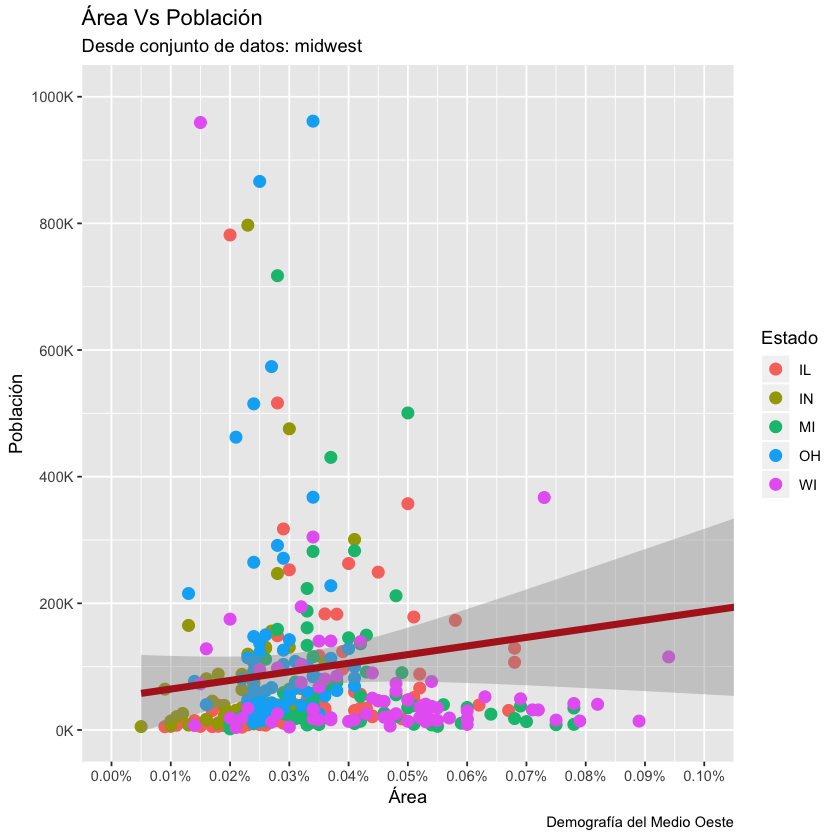

In [35]:
# Gráfico Base
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Colores varían dependiendo de la variable state
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
labs(title="Área Vs Población", 
       subtitle="Desde conjunto de datos: midwest", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado") +
# Agregamos el cambio en los ejes.
  scale_x_continuous(breaks = seq(0, 0.1, 0.01), 
                        labels = sprintf("%1.2f%%", 
                                         seq(0, 0.1, 0.01))) + 
  scale_y_continuous(breaks=seq(0, 1000000, 200000), 
                     labels = function(x){paste0(x/1000, 'K')})

## Cambio de temas

Podemos cambiar la estética del gráfico agregando temas preconstruídos, si buscamos ?theme_bw encontramos todos los temas preconstruídos que podemos utilizar.

In [36]:
?theme_bw

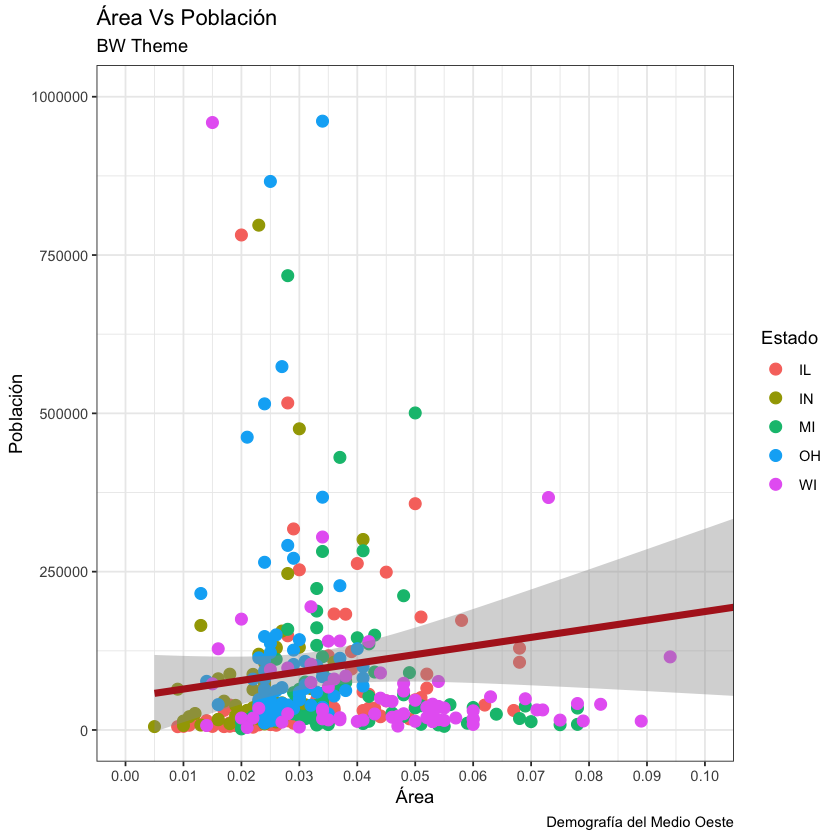

In [37]:
  ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Área Vs Población", 
       subtitle="Tema BW", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado") +
     scale_x_continuous(breaks=seq(0, 0.1, 0.01))+ 
    theme_bw() # Sólo agregamos esta línea


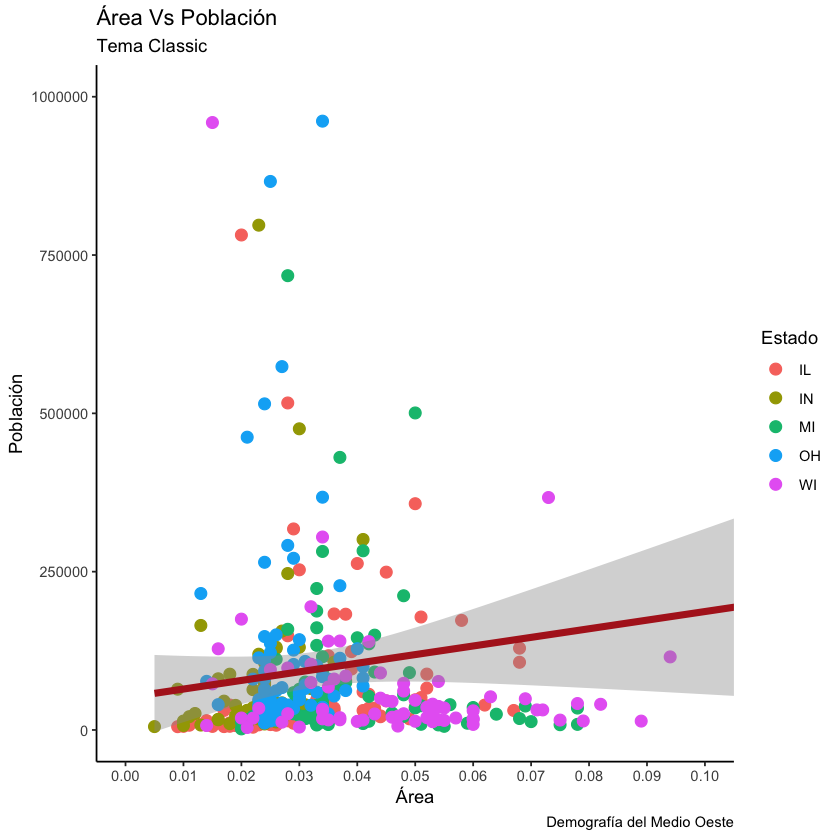

In [38]:
  ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state), size=3) +  # Set color to vary based on state categories.
  geom_smooth(method="lm", col="firebrick", size=2) + 
  coord_cartesian(xlim=c(0, 0.1), ylim=c(0, 1000000)) + 
  labs(title="Área Vs Población", 
       subtitle="Tema Classic", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado") +
     scale_x_continuous(breaks=seq(0, 0.1, 0.01))+ 
    theme_classic() # Sólo agregamos esta línea

## Agregamos elementos al gráfico

Para seguir cambiando la estética del gráfico podemos agregar elementos que nos permitirán personalizar nuestro gráfico. 

Agregando la función "theme" podemos modificar la apariencia del gráfico, ?theme podremos ver todas los argumentos que podemos utilizar

In [42]:
?theme

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

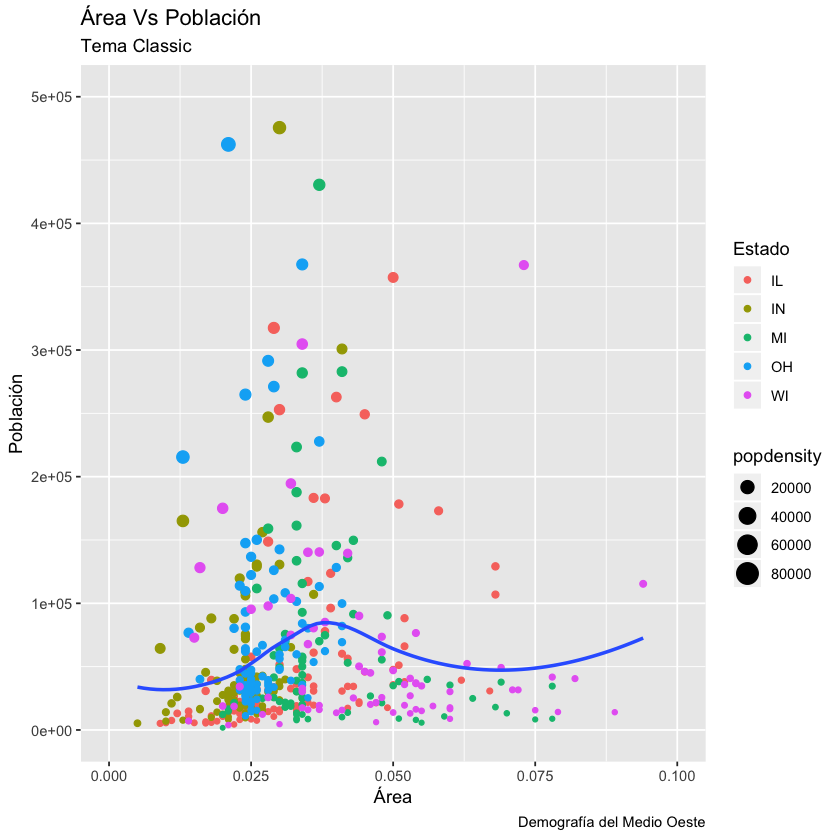

In [43]:
 ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", 
       subtitle="Tema Classic", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado")

Agregamos la densidad de la población para modificar el tamaño de los puntos.

Se pueden agregar los componentes del tema () requieren ser establecidos usando funciones especiales de tipo de elemento (). 

Son 4 tipos principalmente.

element_text (): como el título, subtítulo y subtítulos son elementos textuales, la función element_text () se usa para configurarlo.
element_line (): element_line () también se utiliza para modificar componentes basados en líneas, como las líneas de ejes, las líneas de cuadrícula mayor y menor, etc.
element_rect (): modifica los componentes del rectángulo, como el fondo de la parcela y el panel.
element_blank (): desactiva la visualización del elemento del tema.

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'American Typewriter' が見付かりません ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'American Typewriter' が見付かりません ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'American Typewriter' が見付かりません ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'American Typewriter' が見付かりません ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'American Typewriter' が見付かりません ”Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“ ポストスクリプトフォントのデータベースにフォントファミリ 'American 

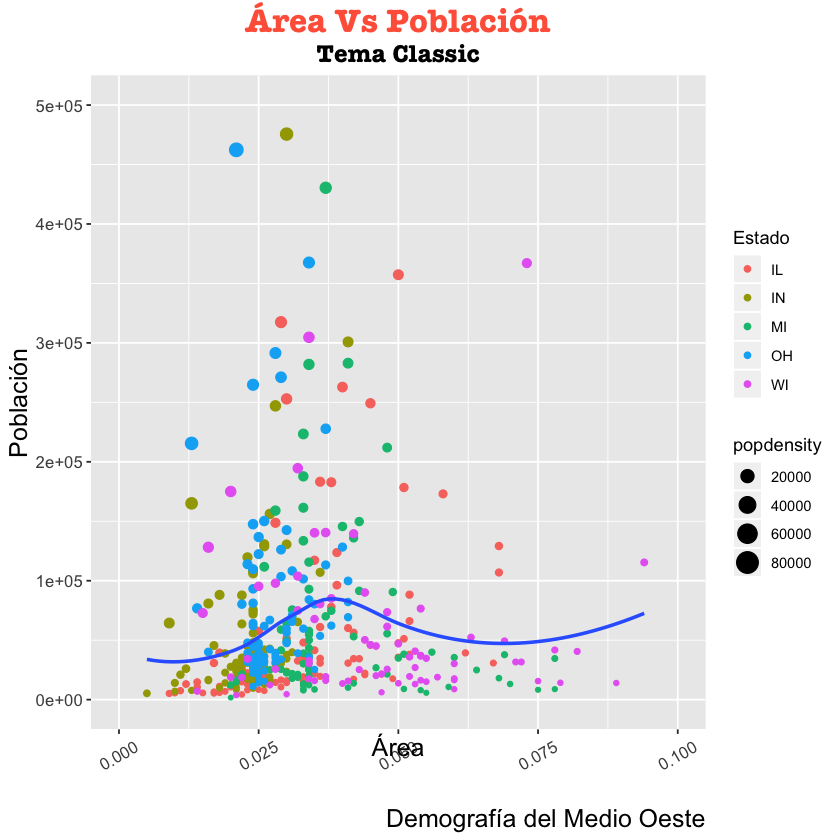

In [49]:
suppressMessages(suppressWarnings( ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", 
       subtitle="Tema Classic", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste",
      col="Estado") +
## Aqui agregamos más argumentos 
theme(plot.title=element_text(size=20, 
                                    face="bold", 
                                    family="American Typewriter",
                                    color="tomato",
                                    hjust=0.5,
                                    lineheight=1.2),  # title
            plot.subtitle=element_text(size=15, 
                                       family="American Typewriter",
                                       face="bold",
                                       hjust=0.5),  # subtitle
            plot.caption=element_text(size=15),  # caption
            axis.title.x=element_text(vjust=10,  
                                      size=15),  # X axis title
            axis.title.y=element_text(size=15),  # Y axis title
            axis.text.x=element_text(size=10, 
                                     angle = 30,
                                     vjust=.5),  # X axis text
            axis.text.y=element_text(size=10))))  # Y axis text

## PD: ignorar los mensajes que aparecen en rojo.

* vjust, controla el espaciado vertical entre el título (o etiqueta) y el trazado.
* hjust, controla el espaciado horizontal. Poniéndolo en 0.5 centra el título.
* family, se utiliza para establecer una nueva fuente.
* face, establece la fuente de la fuente ("normal", "cursiva", "negrita", "negrita.italica").

* El ejemplo anterior cubre algunas de las modificaciones de tema utilizadas con frecuencia y la lista real es demasiado larga. Entonces, ?theme es el primer lugar al que debiese mirar si desea cambiar la apariencia de cualquier componente.

## Modificando la leyenda

Podemos modificar el título de la layenda y también los nombres o colores que por defecte le agrega.

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

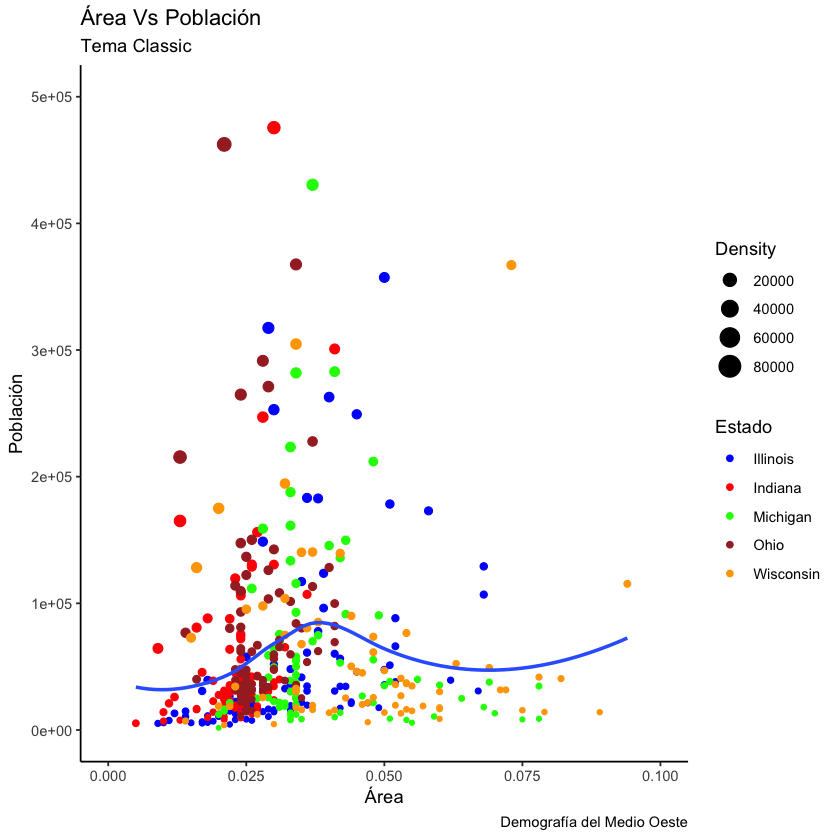

In [55]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", 
       subtitle="Tema Classic", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste") +
    theme_classic() +
 labs(color="Estado", size="Density") +  # Modificando los títulos de las leyendas
 scale_color_manual(name="Estado", 
                        labels = c("Illinois", 
                                   "Indiana", 
                                   "Michigan", 
                                   "Ohio", 
                                   "Wisconsin"), 
                        values = c("IL"="blue", 
                                   "IN"="red", 
                                   "MI"="green", 
                                   "OH"="brown", 
                                   "WI"="orange"))

## Modificar la ubicación de la leyenda

Si quieres mostrar la leyenda de la columna "Estado" antes de "Densidad", puedes hacerlo a través de la función guides(). 

Si quieres cambiar el orden de las etiquetas dentro de la leyenda, 

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

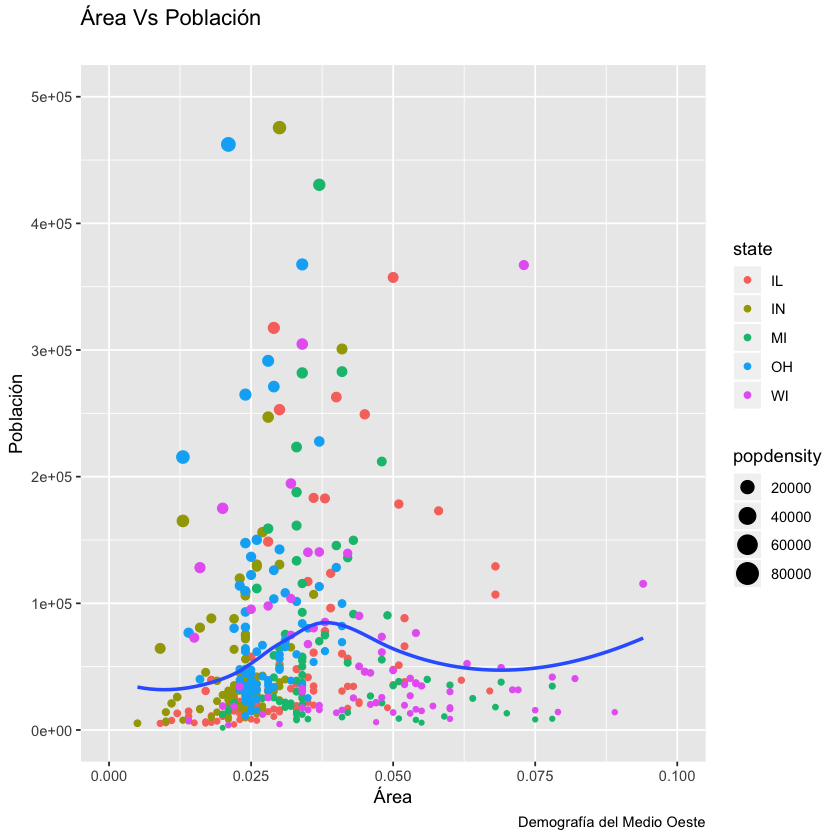

In [54]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", 
       subtitle="", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste") +
guides(colour = guide_legend(order = 1),
            size = guide_legend(order = 2))

# Agregar texto y etiquetas

En ocasiones quisieramos agregar texto y etiquetar alrededor de los puntos.

* Para este conjunto de datos, agregaremos texto a aquellos condados que tengan una población mayor a 300k; Para ello generaremos un subconjunto con tuberías (librería dplyr) de los datos llamado midwest_sub, el cuál contiene solo a los condados que tienen la condición.



In [59]:
midwest_sub <- midwest %>%
            filter(poptotal > 300000)

midwest_sub$large_county <- ifelse(midwest_sub$poptotal > 300000, midwest_sub$county, "")
head(midwest_sub)

PID county  state area  poptotal popdensity popwhite popblack popamerindian
1 576 COOK    IL    0.058 5105067  88018.397  3204947  1317147  10289        
2 582 DU PAGE IL    0.020  781666  39083.300   714905    15462    962        
3 605 KANE    IL    0.029  317471  10947.276   269675    19006    620        
4 609 LAKE    IL    0.028  516418  18443.500   450666    34771   1198        
5 659 WILL    IL    0.050  357313   7146.260   303420    38361    692        
6 664 ALLEN   IN    0.041  300836   7337.463   264086    30314    892        
  popasian ⋯ percprof  poppovertyknown percpovertyknown percbelowpoverty
1 188565   ⋯  8.329964 5023523         98.40269         14.198303       
2  39634   ⋯ 11.963266  771641         98.71748          2.714734       
3   4474   ⋯  7.013300  310740         97.87981          6.846560       
4  12588   ⋯ 11.464008  495312         95.91300          5.159778       
5   4774   ⋯  5.887232  348384         97.50107          6.034720       
6   2644   ⋯  6.859509  296184         98.45364          7.903533       
  percchildbelowpovert percadultpoverty percelderlypoverty inmetro category
1 22.293497            11.665542        10.825269          1       AAU     
2  2.945252             2.399064         3.838249          1       HLU     
3  9.590403             5.551679         6.313803          1       ALU     
4  6.767125             4.191939         6.164430          1       HLU     
5  7.463085             4.799198         8.563398          1       HLU     
6 10.533689             6.789015         7.301494          1       HAU     
  large_county
1 COOK        
2 DU PAGE     
3 KANE        
4 LAKE        
5 WILL        
6 ALLEN

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 14 rows containing missing values (geom_text).”

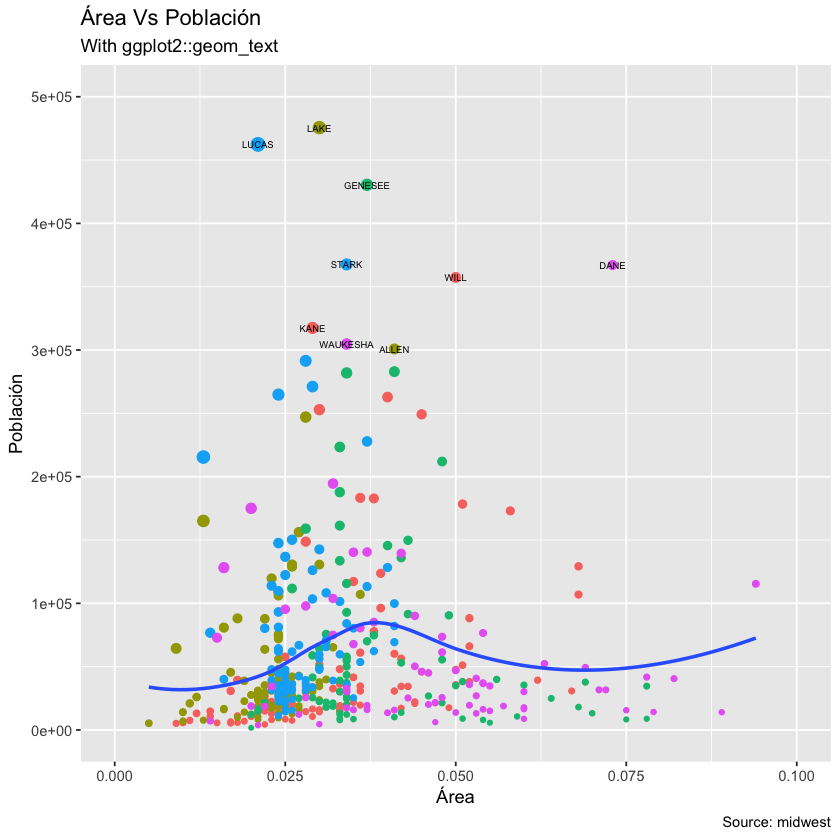

In [60]:
  ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", y="Población", x="Área", 
       caption="Source: midwest")+ 
geom_text(aes(label=large_county), size=2, data=midwest_sub) + 
labs(subtitle="With ggplot2::geom_text") + 
theme(legend.position = "None")   # text



Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”Warning message:
“Removed 14 rows containing missing values (geom_label).”

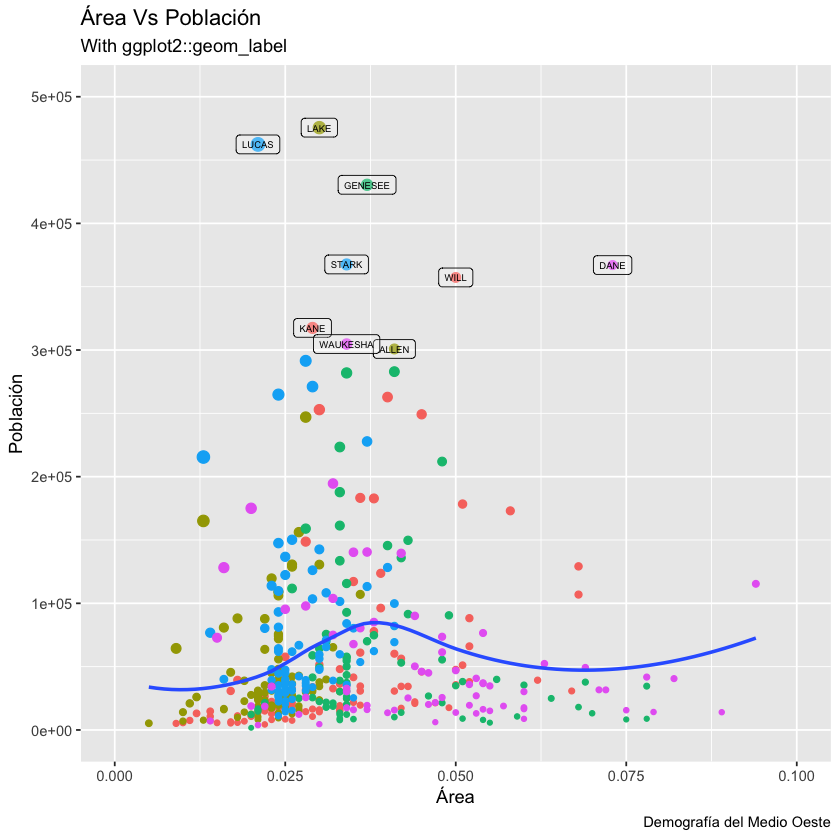

In [61]:
ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", 
       subtitle="", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste") +
  geom_label(aes(label=large_county), size=2, data=midwest_sub, alpha=0.25) + labs(subtitle="With ggplot2::geom_label") + theme(legend.position = "None")  # label


## Si queremos agregar cualquier anotación dentro del gráfico.

Podríamos agregar cualquier texto en cualquier punto del gráfico con la siguiente función annotation_custom() 


###  Primero guardaremos el gráfico base como un objeto llamado gg

In [72]:
gg <- ggplot(midwest, aes(x=area, y=poptotal)) + 
  geom_point(aes(col=state, size=popdensity)) + 
  geom_smooth(method="loess", se=F) + xlim(c(0, 0.1)) + ylim(c(0, 500000)) + 
  labs(title="Área Vs Población", 
       subtitle="", 
       y="Población", x="Área", 
       caption="Demografía del Medio Oeste")

Debemos definir el lugar dónde queremos escribir el texto y además el texto que agregaremos.

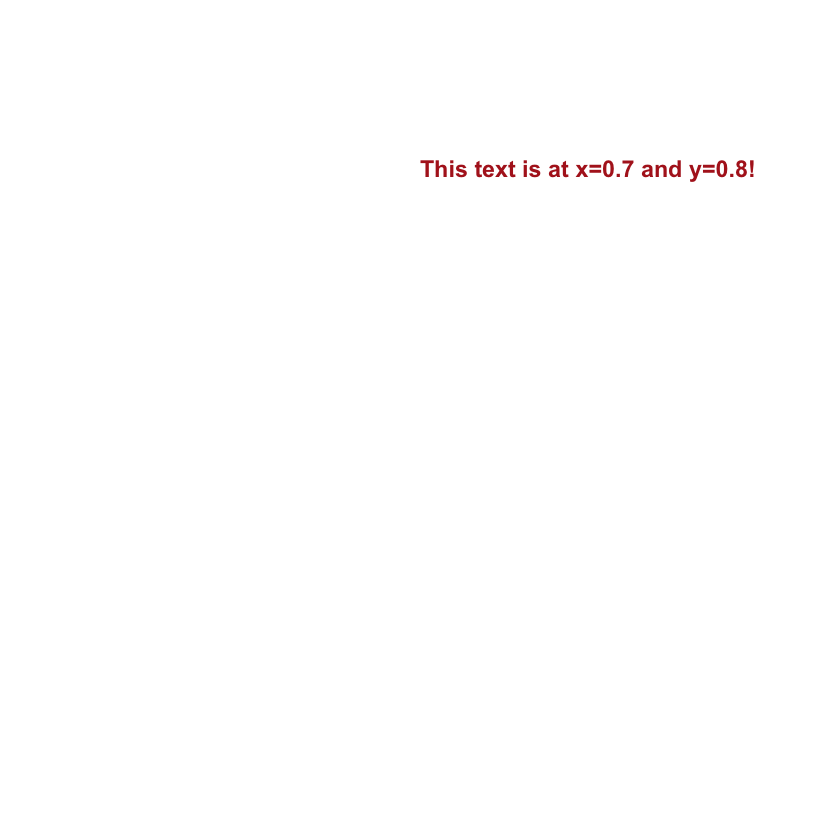

In [75]:
# Define and add annotation -------------------------------------
library(grid)
my_text <- "This text is at x=0.7 and y=0.8!"
my_grob = grid.text(my_text, x=0.7,  y=0.8, gp=gpar(col="firebrick", fontsize=14, fontface="bold"))


### Ahora llamamos el gráfico sólo escribiendo gg y sumando el texto my_grob

Warning message:
“Removed 15 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 15 rows containing missing values (geom_point).”

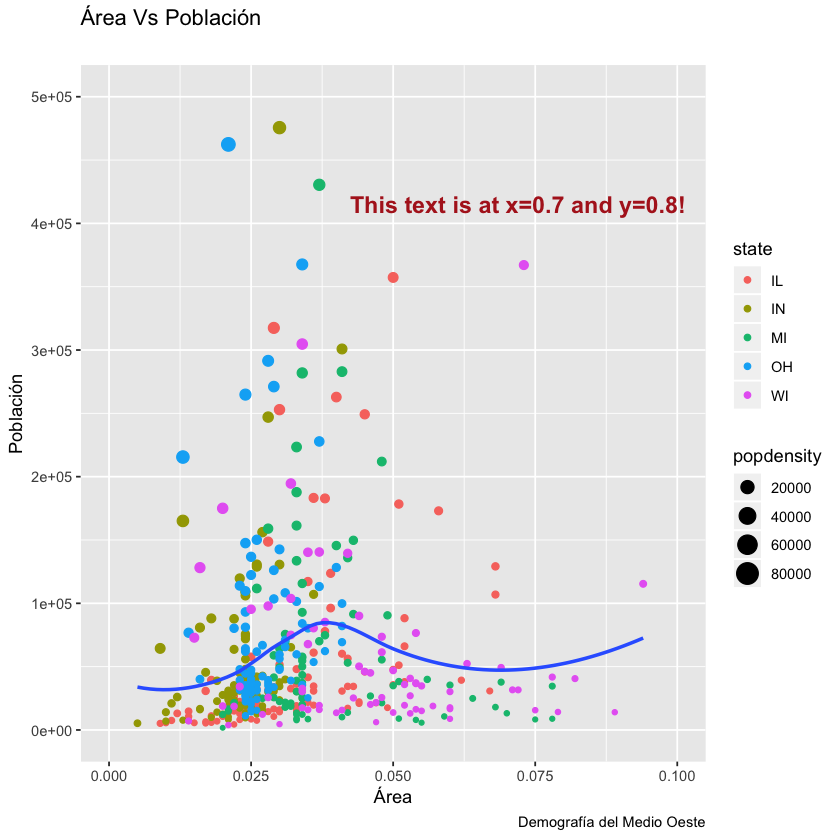

In [76]:
gg + annotation_custom(my_grob)

# Facet Wrap

El facet_wrap () se utiliza para graficar en en varias parcelas pequeñas para diferentes categorías individuales. 

Toma una fórmula como argumento principal. Los elementos a la izquierda de ~ forman las filas mientras que los de la derecha forman las columnas.

Por defecto, todos los gráficos comparten la misma escala tanto en el eje X como en el eje Y.

Para este ejemplo utilizaremos la data mpg, el cual puede buscar más información en help(mpg) o ?mpg

Este conjunto de datos contiene datos de ahorro de combustible entre los años 1999 y 2008 para 38 modelos populares de autos. el conjunto tiene 234 filas y 11 variables.

* Vamos a graficar las variables displ y hwy, busque qué significan e interprete lo que ve en el siguiente gráfico

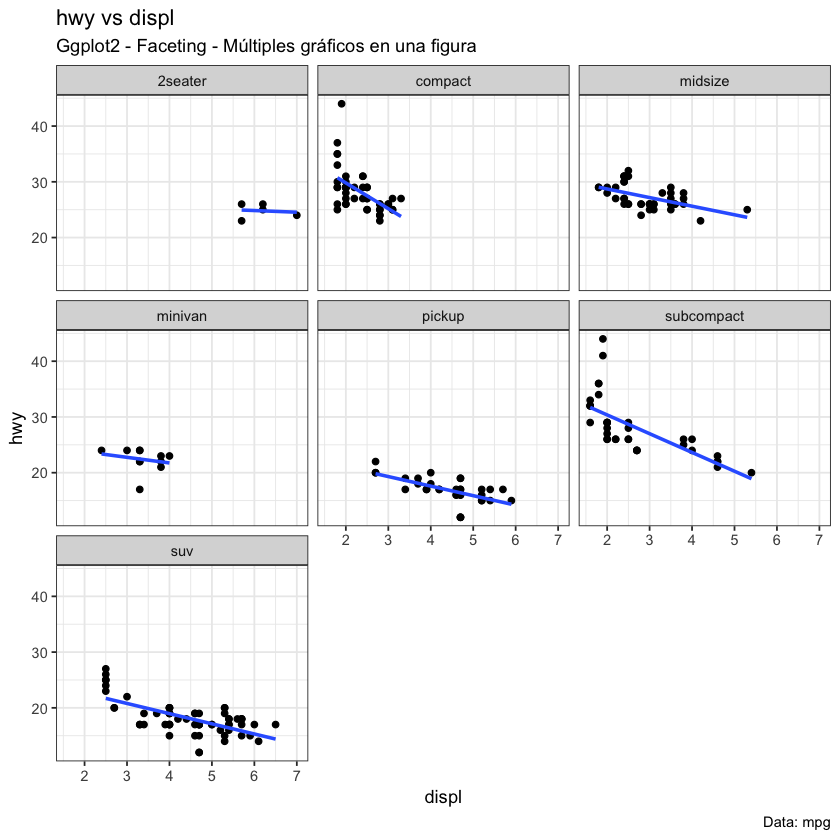

In [85]:
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
      geom_point() + 
      geom_smooth(method="lm", se=FALSE) + 
      theme_bw()  # apply bw theme

g + facet_wrap( ~ class, nrow=3) + 
labs(title="hwy vs displ", caption = "Data: mpg", subtitle="Ggplot2 - Faceting - Múltiples gráficos en una figura")  


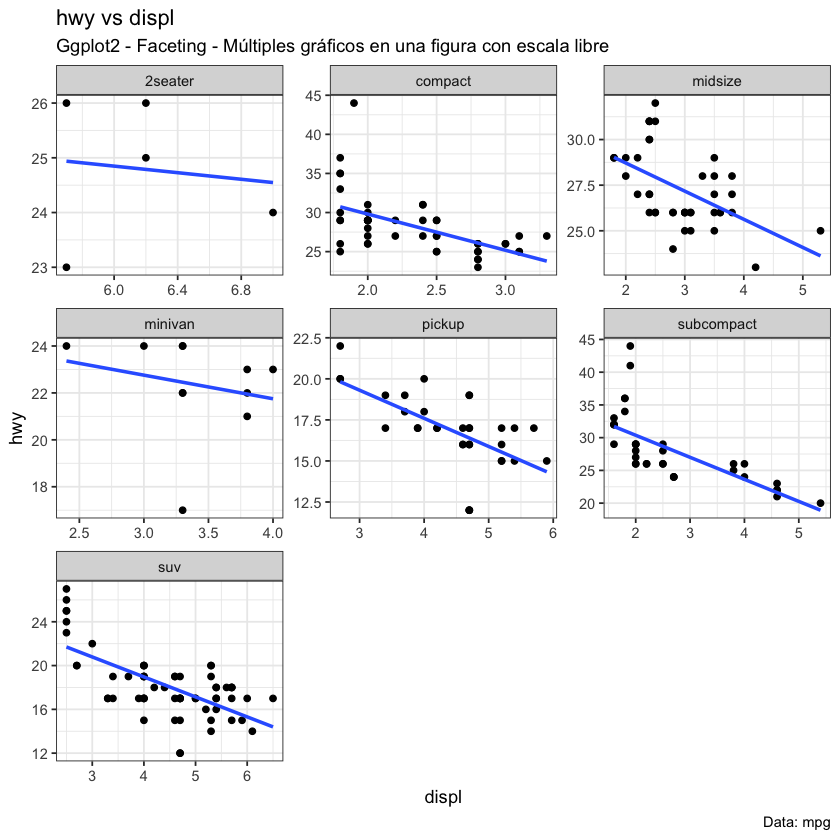

In [84]:
# Facet wrap with free scales
g + facet_wrap( ~ class, scales = "free") + labs(title="hwy vs displ", caption = "Data: mpg", subtitle="Ggplot2 - Faceting - Múltiples gráficos en una figura con escala libre")

Entonces, ¿qué podemos inferir a partir de esto?

# Facet Grid

Los encabezados de las filas medias e inferiores ocupan mucho espacio. El facet_grid () le daría más espacio a los gráficos. La principal diferencia con facet_grid es que no es posible elegir el número de filas y columnas en la cuadrícula.

Muy bien, vamos a crear una cuadrícula para ver cómo varía con el fabricante.

* Fijamos el ggplot en un objeto llamado g.


In [88]:
g <- ggplot(mpg, aes(x=displ, y=hwy)) + 
      geom_point() + 
      labs(title="hwy vs displ", caption = "Data: mpg", subtitle="Ggplot2 - Faceting - Múltiples gráficos en una figura") +
      geom_smooth(method="lm", se=FALSE) + 
      theme_bw()  # Cambiamos el tema :) 

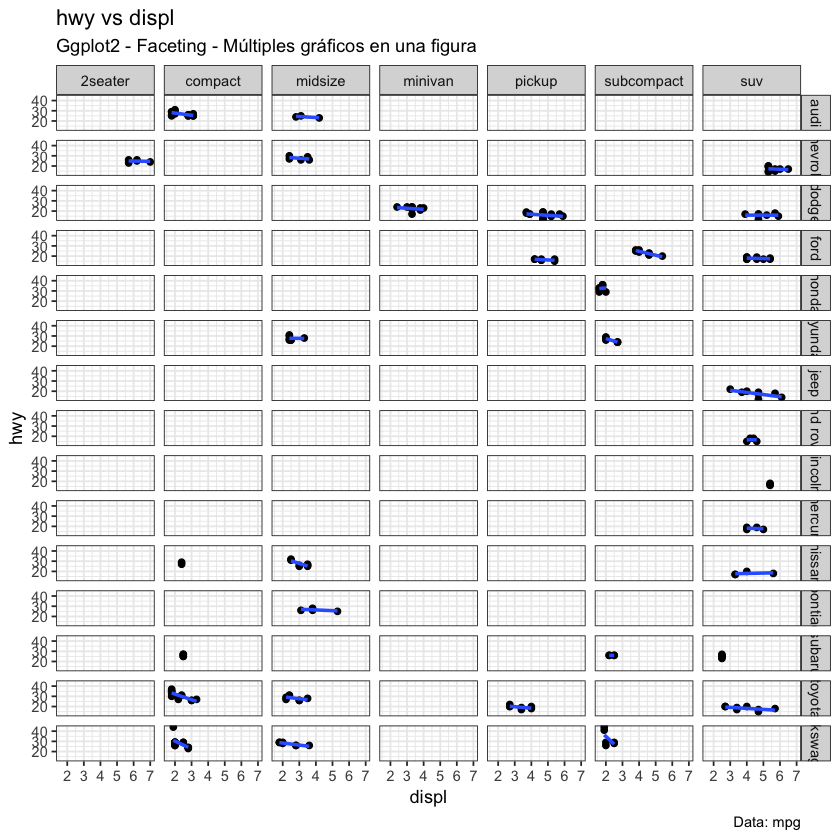

In [89]:
g1 <- g + facet_grid(manufacturer ~ class)  # Fabricante del vehículo en filas y Tipo del vehículo en columnas
plot(g1)

In [101]:
mpg_select <- mpg %>%
        filter(manufacturer %in% c("audi", "ford", "honda", "hyundai"))

head(mpg_select)

manufacturer model displ year cyl trans      drv cty hwy fl class  
1 audi         a4    1.8   1999 4   auto(l5)   f   18  29  p  compact
2 audi         a4    1.8   1999 4   manual(m5) f   21  29  p  compact
3 audi         a4    2.0   2008 4   manual(m6) f   20  31  p  compact
4 audi         a4    2.0   2008 4   auto(av)   f   21  30  p  compact
5 audi         a4    2.8   1999 6   auto(l5)   f   16  26  p  compact
6 audi         a4    2.8   1999 6   manual(m5) f   18  26  p  compact

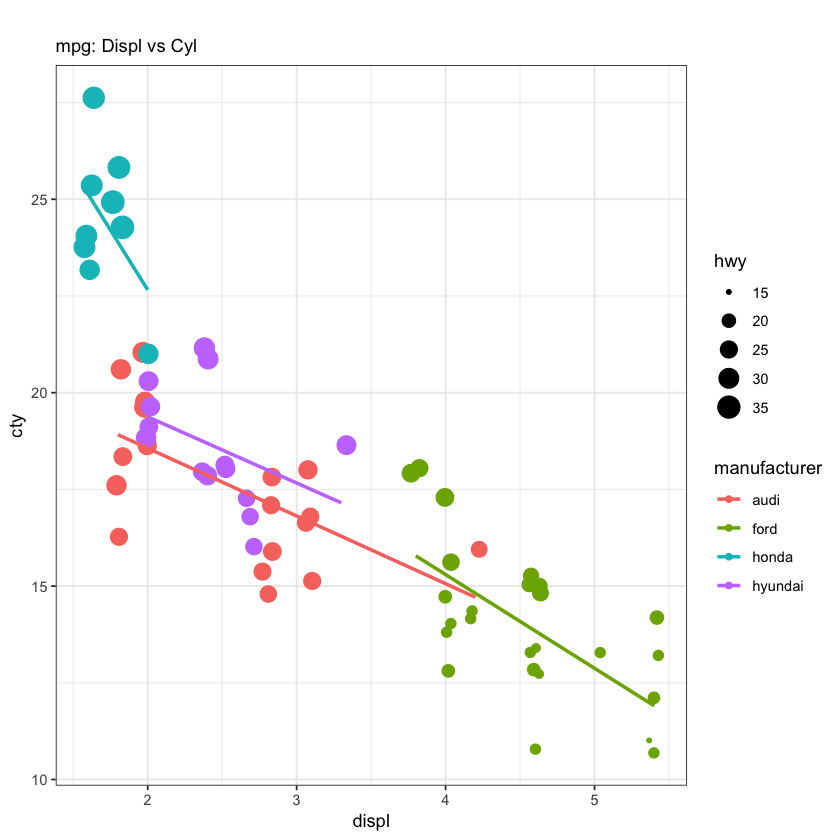

In [105]:
# Scatterplot
theme_set(theme_bw())  # preseleccionamos el tema del gráfico.

g + geom_jitter(aes(col=manufacturer, size=hwy)) + 
  geom_smooth(aes(col=manufacturer), method="lm", se=F)

# Desviación 

### Barras divergentes

Las barras divergentes es un gráfico de barras que puede manejar valores negativos y positivos. 

Esto se puede implementar mediante un ajuste inteligente con geom_bar(). 

Por defecto, geom_bar () tiene el conjunto de estadísticas que cuentan, eso significa que, cuando proporciona solo una variable X continua (y ninguna variable Y), intenta hacer un histograma a partir de los datos.

Para hacer un gráfico de barras, crear barras en lugar de histograma, debe hacer dos cosas.

* Establecer stat = identidad
* Proporcionar tanto x como y dentro de aes () donde, x es un carácter o factor e y es numérico.
*  Para asegurarse de que obtiene barras divergentes en lugar de solo barras, asegúrese de que su variable categórica tenga 2 categorías que cambien los valores en un cierto umbral de la variable continua. En el siguiente ejemplo, el mpg del conjunto de datos mtcars se normaliza al calcular la puntuación z. Los vehículos con mpg por encima de cero están marcados en verde y los de abajo están marcados en rojo.

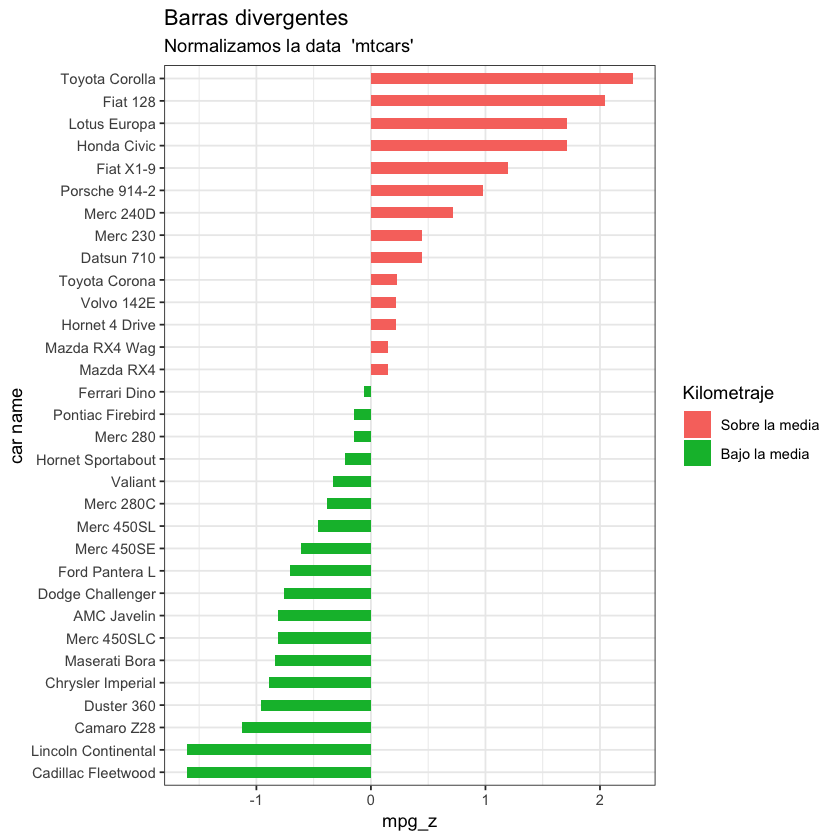

In [107]:
theme_set(theme_bw())  # Fijamos el tema

data("mtcars")  # cargamos la data que usaremos

mtcars$`car name` <- rownames(mtcars)  # Creamos una nueva columna para los nombres de vehículos
mtcars$mpg_z <- round((mtcars$mpg - mean(mtcars$mpg))/sd(mtcars$mpg), 2)  # normalizamos mpg
mtcars$mpg_type <- ifelse(mtcars$mpg_z < 0, "Sobre", "Bajo")  

mtcars <- mtcars[order(mtcars$mpg_z), ]  # ordenamos
mtcars$`car name` <- factor(mtcars$`car name`, levels = mtcars$`car name`)  # convertimos a factor para ordenar

# Diverging Barcharts
ggplot(mtcars, aes(x=`car name`, y = mpg_z, label = mpg_z)) + 
  geom_bar(stat='identity', aes(fill = mpg_type), width = .5)  +
  scale_fill_manual(name = "Rendimiento", 
                    labels = c("Sobre la media", "Bajo la media"), 
                    values = c("Sobre"="#00ba38", "Bajo" = "#f8766d")) + 
  labs(subtitle="Normalizamos la data  'mtcars'", 
       title= "Barras divergentes") + 
  coord_flip()

# Ranking





In [109]:

cty_mpg <- aggregate(mpg$cty, by=list(mpg$manufacturer), FUN=mean)  # aggregate
colnames(cty_mpg) <- c("make", "mileage")  # change column names
cty_mpg <- cty_mpg[order(cty_mpg$mileage), ]  # sort
cty_mpg$make <- factor(cty_mpg$make, levels = cty_mpg$make)  # to retain the order in plot.
head(cty_mpg, 4)

make       mileage 
9  lincoln    11.33333
8  land rover 11.50000
3  dodge      13.13514
10 mercury    13.25000

Nuestra variable es ahora factor (categórica), y el gráfico queda así 

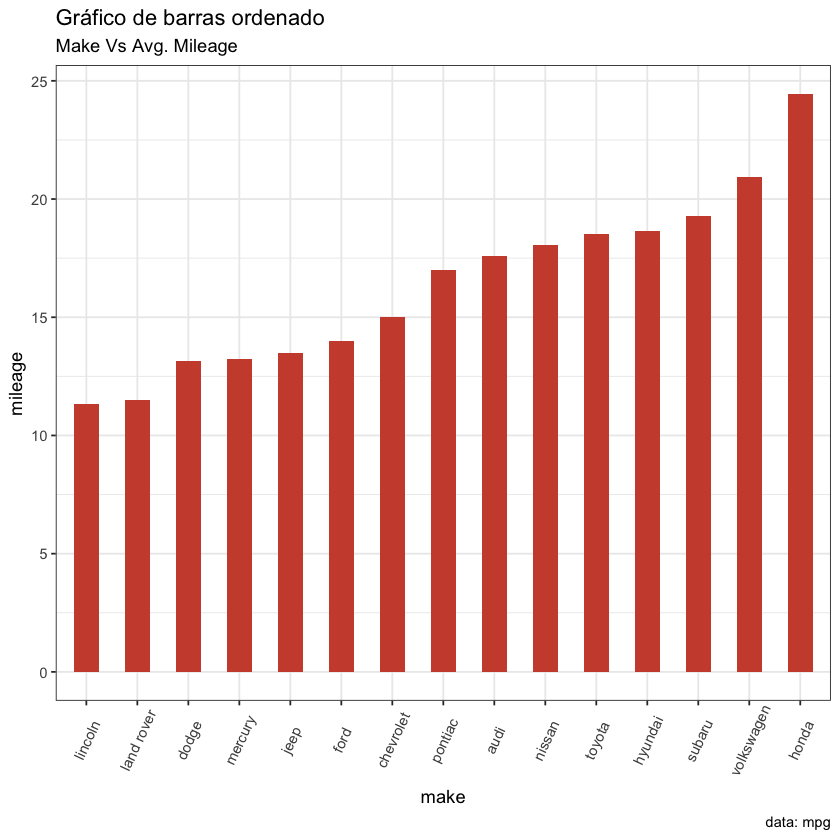

In [111]:
theme_set(theme_bw())

# Draw plot
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_bar(stat="identity", width=.5, fill="tomato3") + 
  labs(title="Gráfico de barras ordenado", 
       subtitle="Marca Vs Rendimiento promedio", 
       caption="data: mpg") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

# Gráfico Lollipop

Es la misma información que un gráfico de barras, lo bueno es que reduce espacio al ser barras más delgadas

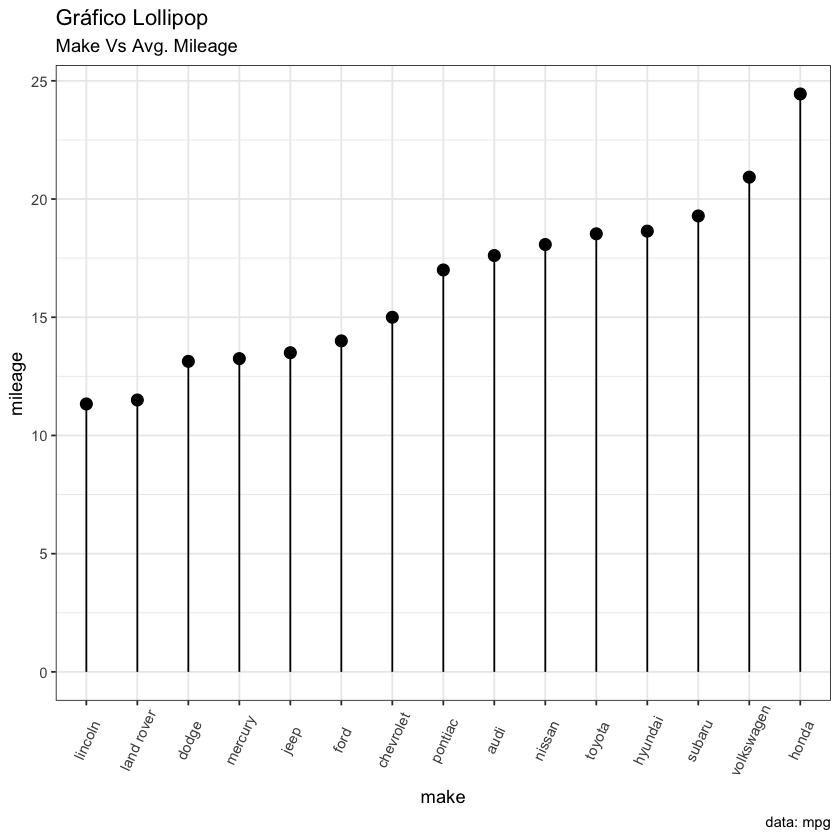

In [112]:
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_point(size=3) + 
  geom_segment(aes(x=make, 
                   xend=make, 
                   y=0, 
                   yend=mileage)) + 
  labs(title="Gráfico Lollipop", 
       subtitle="Make Vs Avg. Mileage", 
       caption="data: mpg") + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6))

# Gráfico de puntos

Éstos gráficos son muy parecidos al anterior, pero sin la línea y su posición es horizontal.

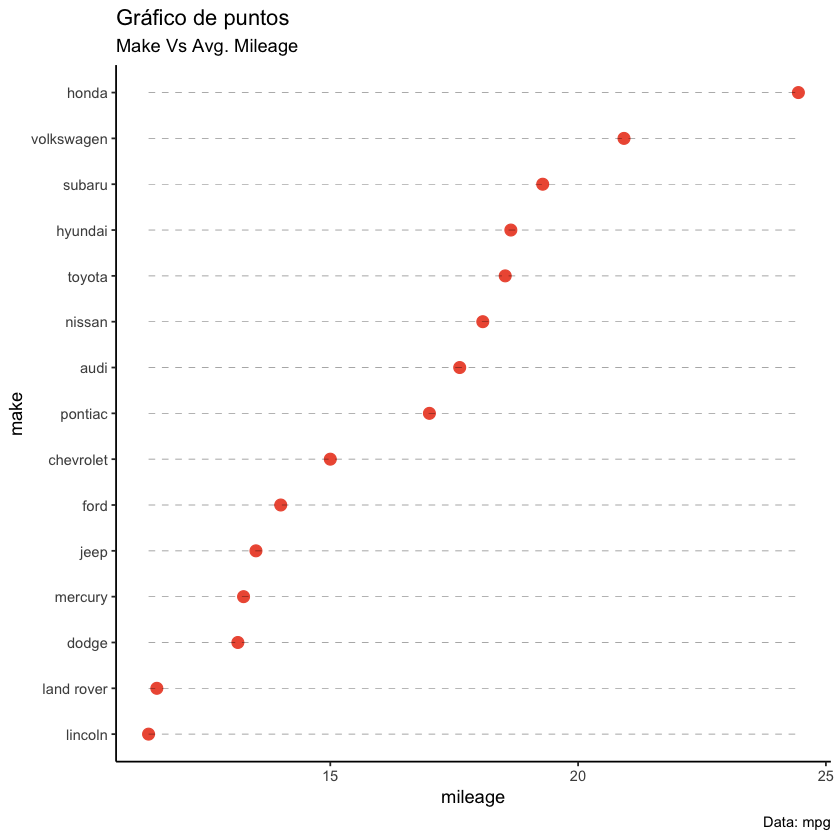

In [114]:
library(scales)
theme_set(theme_classic())

# Plot
ggplot(cty_mpg, aes(x=make, y=mileage)) + 
  geom_point(col="tomato2", size=3) +   # Draw points
  geom_segment(aes(x=make, 
                   xend=make, 
                   y=min(mileage), 
                   yend=max(mileage)), 
               linetype="dashed", 
               size=0.1) +   # Draw dashed lines
  labs(title="Gráfico de puntos", 
       subtitle="Make Vs Avg. Mileage", 
       caption="Data: mpg") +  
  coord_flip()




# Distribuciones

### Histogramas

De forma predeterminada, si solo se suministra una variable, geom_bar () lo que calcula el gráfico es el recuento. Para que se comporte como un gráfico de barras, se debe configurar la opción "stat = identity" y se deben proporcionar los valores para x e y.

### Histograma en una variable continua

El histograma en una variable continua se puede lograr usando geom_bar() o geom_histogram(). 

* Al usar geom_histogram(), puedes controlar el número de barras usando la opción de contenedores. De lo contrario, puede establecer el rango cubierto por cada contenedor utilizando binwidth. 
* El valor de binwidth está en la misma escala que la variable continua en la que se construye el histograma. Dado que, geom_histogram brinda la posibilidad de controlar tanto el número de bins como el binwidth, es la opción preferida para crear un histograma en variables continuas.

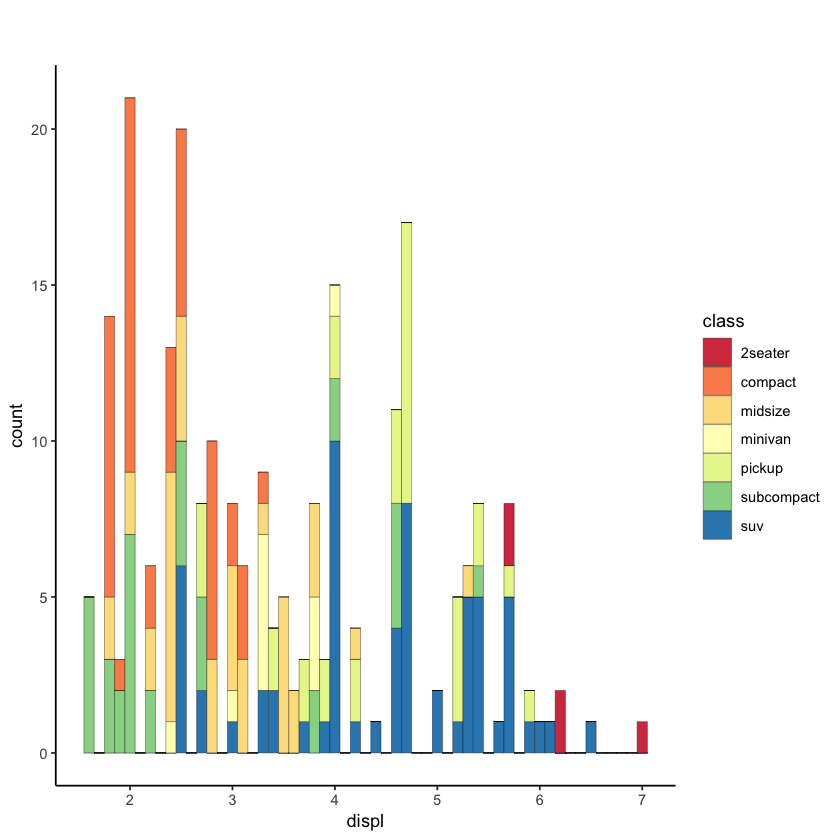

In [117]:
theme_set(theme_classic())

# Histogram on a Continuous (Numeric) Variable
g <- ggplot(mpg, aes(displ)) + scale_fill_brewer(palette = "Spectral")

g + geom_histogram(aes(fill=class), 
                   binwidth = .1, 
                   col="black", 
                   size=.1) +  # change binwidth
  labs(title="", 
       subtitle="")  



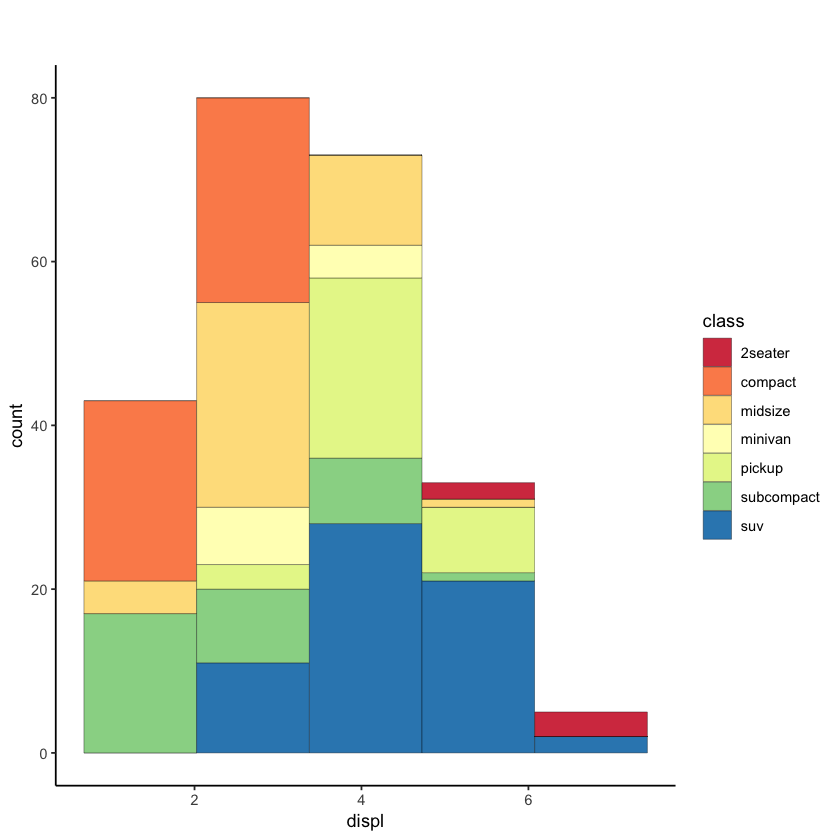

In [118]:
g + geom_histogram(aes(fill=class), 
                   bins=5, 
                   col="black", 
                   size=.1) +   # Cambiando el número de binwith
  labs(title="", 
       subtitle="") 

Podemos graficar variables categóricas

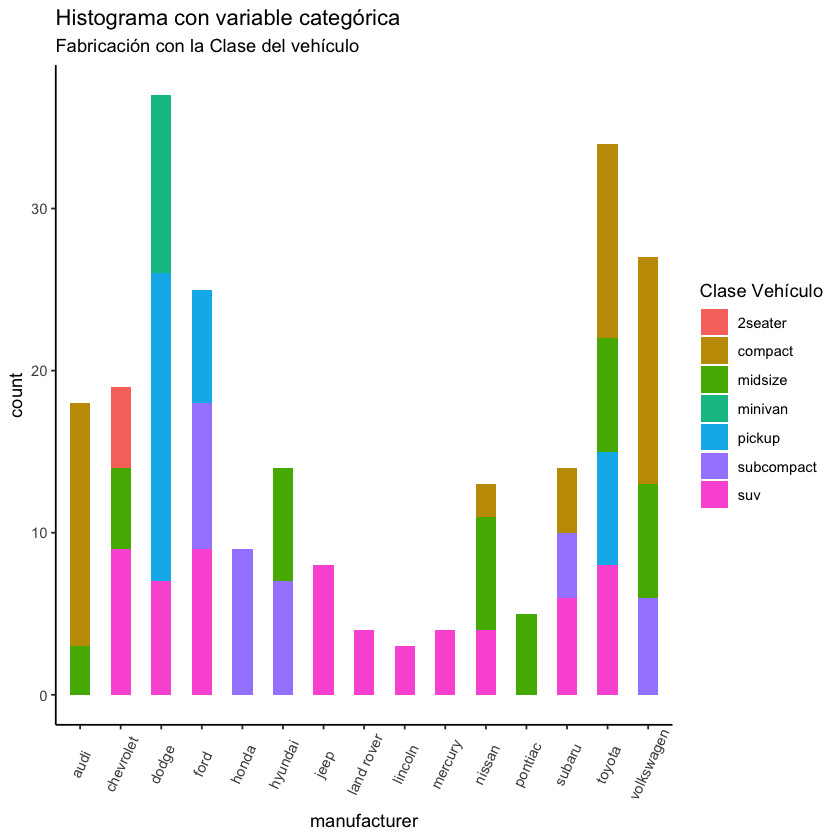

In [121]:
theme_set(theme_classic())
g <- ggplot(mpg, aes(manufacturer))
g + geom_bar(aes(fill=class), width = 0.5) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Histograma con variable categórica", 
       subtitle="Fabricación con la Clase del vehículo", fill = "Clase Vehículo") 

# Gráfico de Densidad

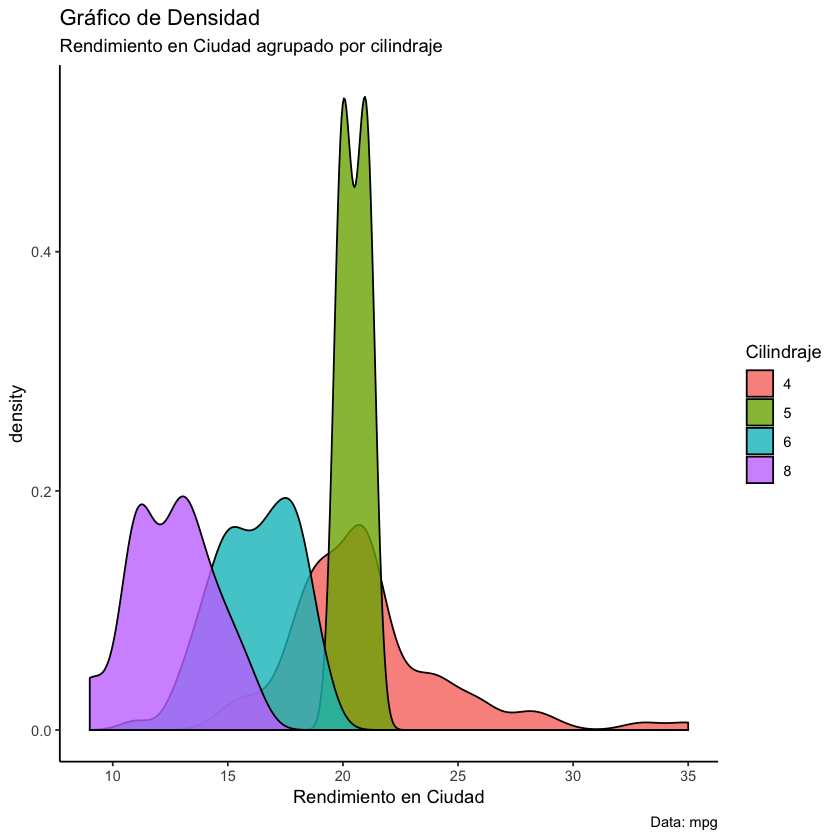

In [123]:
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(cty))
g + geom_density(aes(fill=factor(cyl)), alpha=0.8) + 
    labs(title="Gráfico de Densidad", 
         subtitle="Rendimiento en Ciudad agrupado por cilindraje",
         caption="Data: mpg",
         x="Rendimiento en Ciudad",
         fill="Cilindraje")

# Box Plot

El Box plot o gráfico de caja es una excelente herramienta para estudiar la distribución de los datos. También puede mostrar las distribuciones dentro de múltiples grupos, junto con la mediana, el rango y los valores atípicos, si es que los hay.

La línea oscura dentro de la caja representa la mediana. La parte superior de la caja es del 75% y la parte inferior de la caja es del 25%. 

Los puntos finales de las líneas (también conocido como bigotes) están a una distancia de 1.5 * IQR, donde IQR o Inter Quartile Range es la distancia entre los percentiles 25 y 75. Los puntos fuera de los bigotes están marcados como puntos y normalmente se consideran puntos extremos.

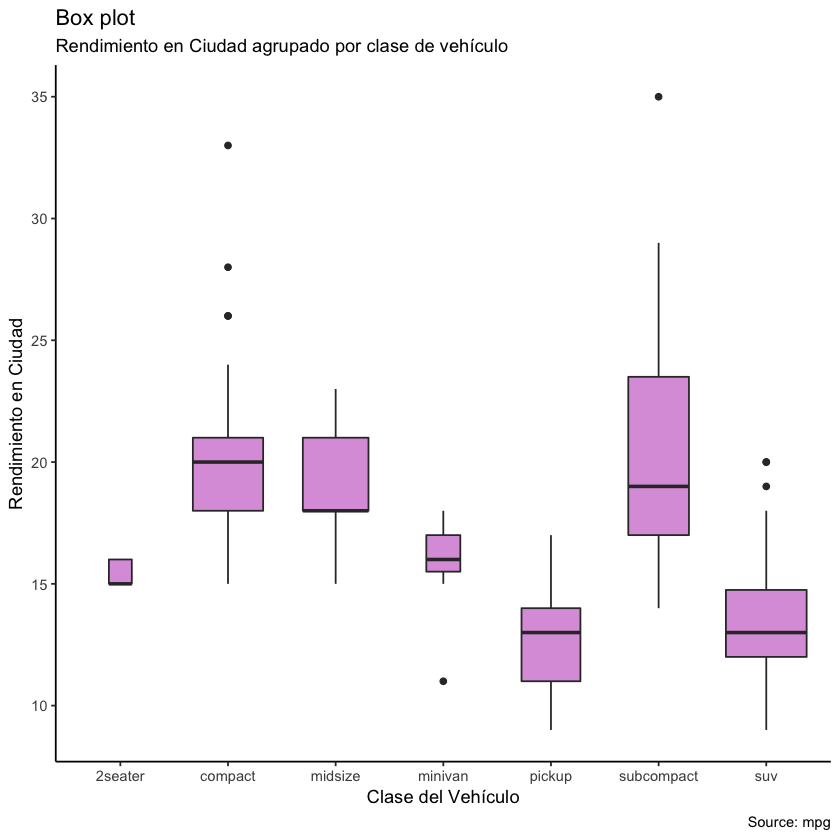

In [124]:
theme_set(theme_classic())

# Plot
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(varwidth=T, fill="plum") + 
    labs(title="Box plot", 
         subtitle="Rendimiento en Ciudad agrupado por clase de vehículo",
         caption="Source: mpg",
         x="Clase del Vehículo",
         y="Rendimiento en Ciudad")

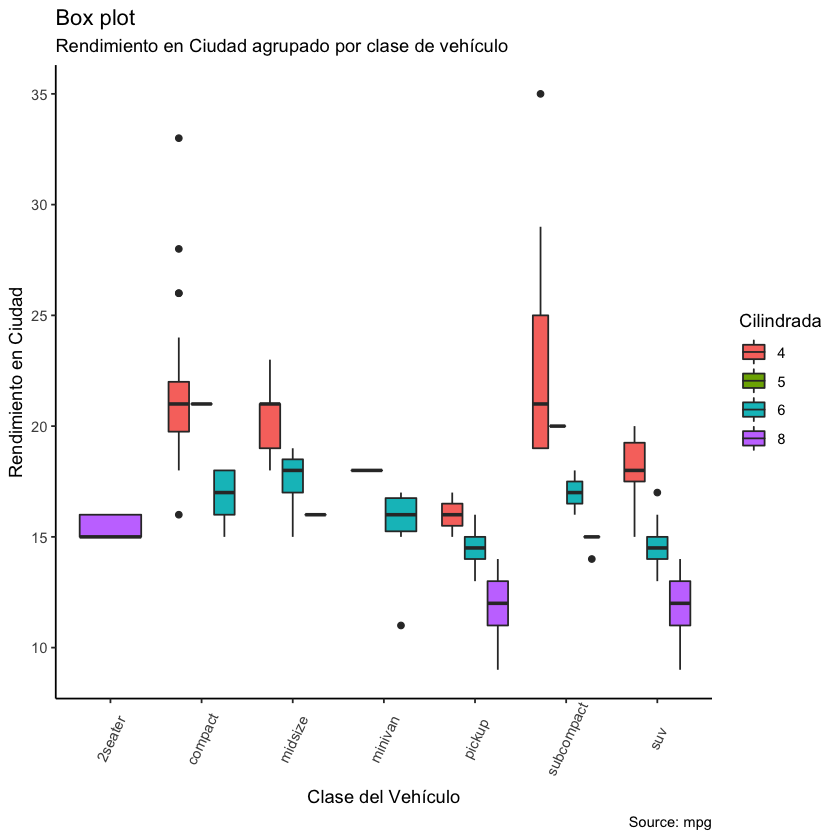

In [125]:
g <- ggplot(mpg, aes(class, cty))
g + geom_boxplot(aes(fill=factor(cyl))) + 
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + 
  labs(title="Box plot", 
         subtitle="Rendimiento en Ciudad agrupado por clase de vehículo",
         caption="Source: mpg",
         x="Clase del Vehículo",
         y="Rendimiento en Ciudad",
      fill = "Cilindrada")

# Gráfico de Violín 

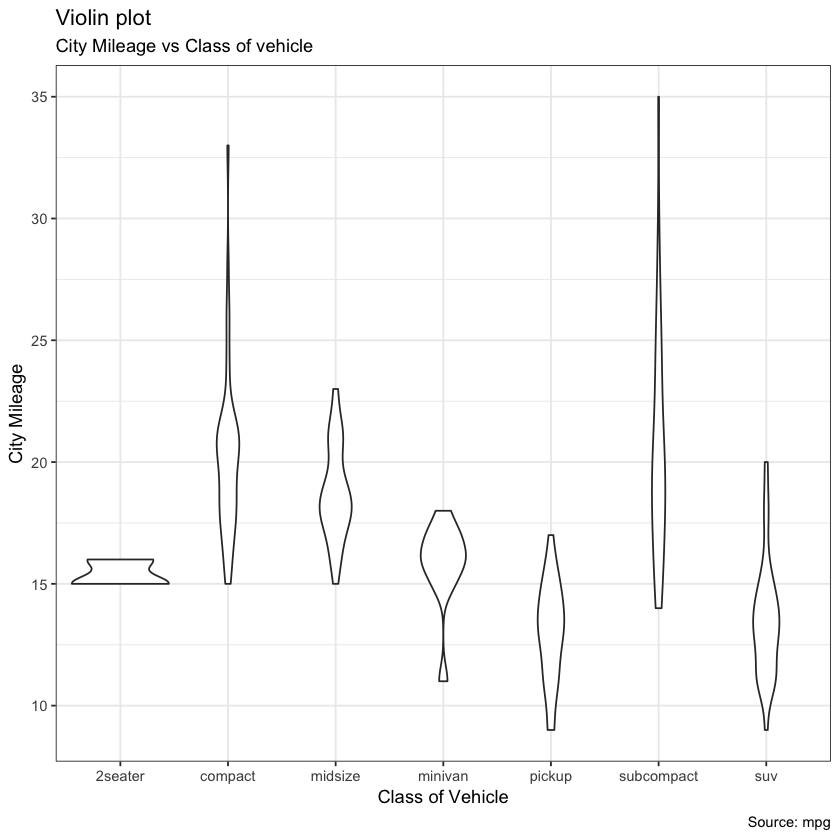

In [108]:
theme_set(theme_bw())

# plot
g <- ggplot(mpg, aes(class, cty))
g + geom_violin() + 
  labs(title="Gráfico de Violín", 
       subtitle="Rendimiento en Ciudad vs Class of vehicle",
       caption="Source: mpg",
       x="Class of Vehicle",
       y="City Mileage")

# Gráfico de torta o de pizza :)

El gráfico circular (de pizza), es una forma clásica de mostrar las composiciones. Pero es un poco complicado de implementar en ggplot2, lo haremos usando la función coord_polar ().


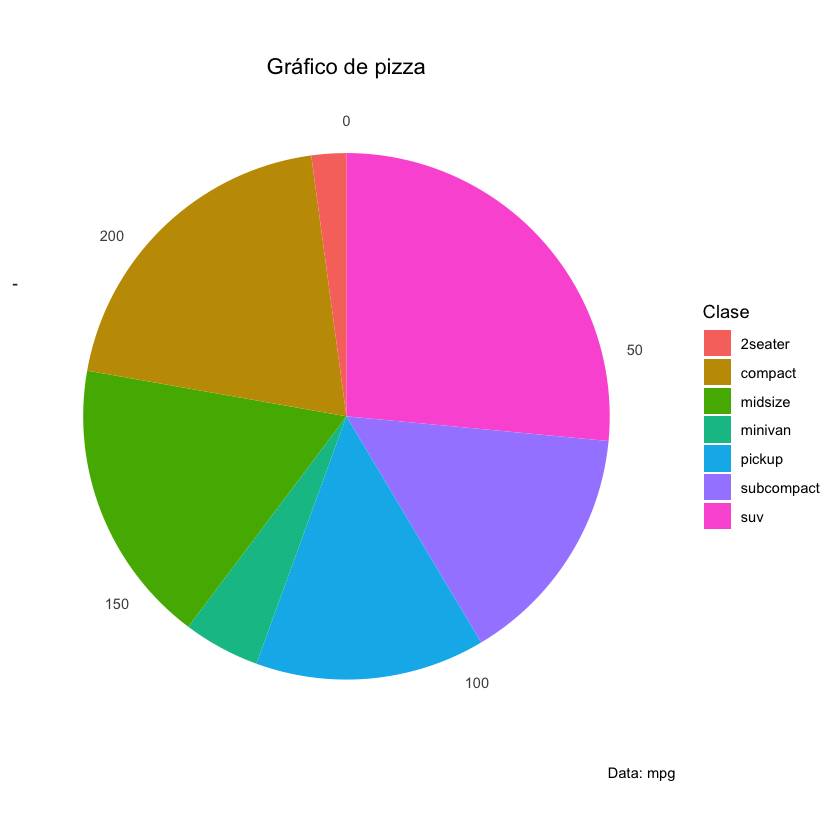

In [127]:
theme_set(theme_classic())

# Source: Frequency table
df <- as.data.frame(table(mpg$class))
colnames(df) <- c("class", "freq")
pie <- ggplot(df, aes(x = "", y=freq, fill = factor(class))) + 
  geom_bar(width = 1, stat = "identity") +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="Clase", 
       x=NULL, 
       y=NULL, 
       title="Gráfico de pizza", 
       caption="Data: mpg")

pie + coord_polar(theta = "y", start=0)

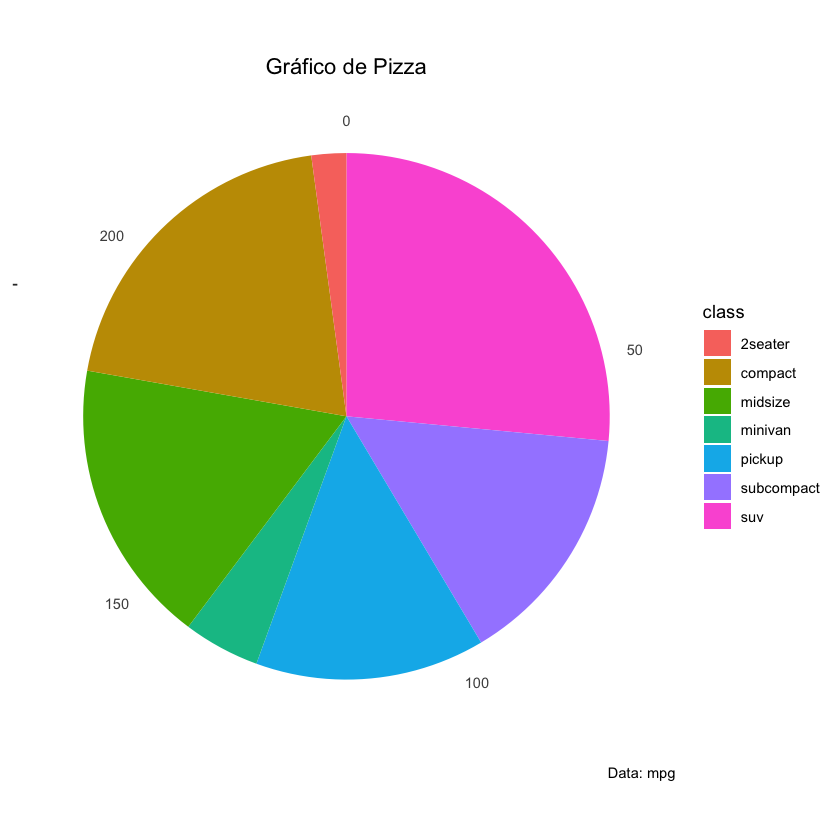

In [129]:
# Source: Categorical variable.
# mpg$class
pie <- ggplot(mpg, aes(x = "", fill = factor(class))) + 
  geom_bar(width = 1) +
  theme(axis.line = element_blank(), 
        plot.title = element_text(hjust=0.5)) + 
  labs(fill="class", 
       x=NULL, 
       y=NULL, 
       title="Gráfico de Pizza", 
       caption="Data: mpg")
  
pie + coord_polar(theta = "y", start=0)